In [1]:
import requests
import json
import matplotlib.pyplot as plt;
import numpy as np
from statistics import stdev,mean
import seaborn as sns
#np.seterr(divide='ignore', invalid='ignore')


In [2]:
def jsonprint(doc):
    text = json.dumps(doc,sort_keys=True,indent=4)
    print(text)


In [3]:
with open("data8.json") as file:
    data = json.load(file)
    #print(data["0"]["rankingPokemonInfo"])

cnt_pok_type = {}
cnt_pok_type_2 = {}

for i in data:
    pok_type = data[i]["rankingPokemonInfo"]["typeName1"]
    pok_type2 = data[i]["rankingPokemonInfo"]["typeName2"]
    if (pok_type not in cnt_pok_type or pok_type2 not in cnt_pok_type_2) and pok_type2 != None:
        cnt_pok_type[pok_type] = 1
        cnt_pok_type_2[pok_type2] = 1
    elif pok_type2 == None:
        pass
    else:
        cnt_pok_type[pok_type] = cnt_pok_type[pok_type] + 1
        cnt_pok_type_2[pok_type2] = cnt_pok_type_2[pok_type2] + 1

    

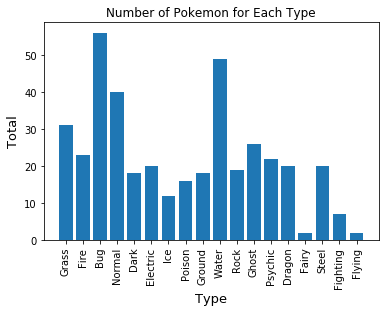

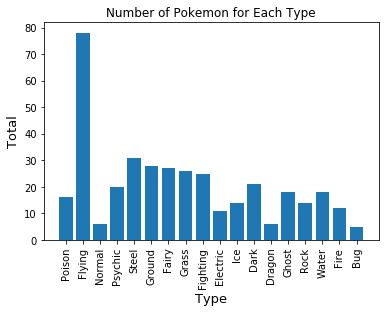

In [4]:
label = []
cnt = []
label2 = []
cnt2 = []
for i in cnt_pok_type:
    label.append(i)
    cnt.append(cnt_pok_type[i])

for i in cnt_pok_type_2:
    label2.append(i)
    cnt2.append(cnt_pok_type_2[i])

index = np.arange(len(label))
plt.bar(index,cnt)
plt.xlabel("Type",fontsize=13)
plt.ylabel("Total",fontsize=13)
plt.xticks(index,label,fontsize=10,rotation=90)
plt.title("Number of Pokemon for Each Type")
plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/num_pok_type1.png',bbox_inches='tight')
plt.show()
index2 = np.arange(len(label2))
plt.bar(index2,cnt2)
plt.xlabel("Type",fontsize=13)
plt.ylabel("Total",fontsize=13)
plt.xticks(index2,label2,fontsize=10,rotation=90)
plt.title("Number of Pokemon for Each Type")

#plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/num_pok_type2.png',bbox_inches='tight')
plt.show()



In [5]:
type_eff = {
    "bug" : [["Grass","Dark","Psychic"],["Fire","Flying","Rock"]],
    "dark" : [["Ghost","Psychic"],["Bug","Fairy","Fighting"]],
    "dragon" : [["Dragon"],["Dragon","Fairy","Ice"]],
    "electric" :[["Flying","Water"],["Ground"]],
    "fairy":[["Fighting","Dark","Dragon"],["Poison","Steel"]],
    "fighting":[["Dark","Ice","Normal","Rock","Steel"],["Fairy","Flying","Psychic"]],
    "fire":[["Bug","Grass","Ice","Steel"],["Ground","Rock","Water"]],
    "flying":[["Bug","Fighting","Grass"],["Electric","Ice","Rock"]],
    "ghost":[["Ghost","Psychic"],["Dark","Ghost"]],
    "grass":[["Ground","Rock","Water"],["Bug","Fire","Flying","Ice","Poison"]],
    "ground":[["Electric","Fire","Poison","Rock","Steel"],["Grass","Ice","Water"]],
    "ice":[["Dragon","Flying","Grass","Ground"],["Fighting","Fire","Rock","Steel"]],
    "normal":[[],["Fighting"]],
    "poison":[["Fairy","Grass"],["Ground","Psychic"]],
    "psychic":[["Fighting","Poison"],["Bug","Dark","Ghost"]],
    "rock":[["Bug","Fire","Flying","Ice"],["Fighting","Grass","Ground","Steel","Water"]],
    "steel":[["Fairy","Ice","Rock"],["Fighting","Fire","Ground"]],
    "water":[["Fire","Ground","Rock"],["Electric","Grass"]]
}




In [6]:
def win_perc(strong,weak,pok_type,toggle):
    win_cnt = 0
    loss_cnt = 0
    cnt = 0
    for i in pok_type:
        if i in strong:
            win_cnt = pok_type[i] + win_cnt
        elif i in weak:
            loss_cnt = pok_type[i] + loss_cnt
        else:
            cnt = pok_type[i] + cnt
    if toggle == 0: #win 
        return (win_cnt / (win_cnt + loss_cnt + cnt)) * 100
    else: #loss
        return (loss_cnt/ (win_cnt + loss_cnt + cnt)) * 100
    
def stand_dev(strong,weak,pok_type):
    win_cnt = []
    tot = 0
    tot1 = 0
    cnt = 0
    for i in pok_type:
        if i in strong:
            win_cnt.append(pok_type[i])
        else:
            cnt = pok_type[i] + cnt
    for i in win_cnt:
        tot = tot + np.power(i,2)
        tot1 = tot1 + i
    left = tot/(len(win_cnt)+cnt)
    right = np.power((tot1/(len(win_cnt)+cnt)),2)
    return np.sqrt(left-right)
   
    
        


In [7]:
#Win % or avg of winning for each type
for i in type_eff:
    perc_w = win_perc(type_eff[i][0],type_eff[i][1],cnt_pok_type,0)
    #perc_l = win_perc(type_eff[i][0],type_eff[i][1],cnt_pok_type,1)
    var = stand_dev(type_eff[i][0],type_eff[i][1],cnt_pok_type)
    print(i,"win: ",perc_w," stndv: ",var)



bug win:  17.70573566084788  stndv:  2.294962404490237
dark win:  11.970074812967582  stndv:  1.802588013639083
dragon win:  4.987531172069826  stndv:  1.0219487589499023
electric win:  12.718204488778055  stndv:  2.6098648059370038
fairy win:  11.221945137157107  stndv:  1.462016133299751
fighting win:  27.18204488778055  stndv:  3.064402234345341
fire win:  29.67581047381546  stndv:  4.006762646083368
flying win:  23.44139650872818  stndv:  3.6444818093507982
ghost win:  11.970074812967582  stndv:  1.802588013639083
grass win:  21.44638403990025  stndv:  3.103427876728049
ground win:  24.438902743142144  stndv:  2.4933796639822687
ice win:  17.70573566084788  stndv:  2.2386822375149844
normal win:  0.0  stndv:  0.0
poison win:  8.229426433915211  stndv:  1.6124991152369303
psychic win:  5.7356608478802995  stndv:  0.8938501798647922
rock win:  23.19201995012469  stndv:  3.4831457038261897
steel win:  8.229426433915211  stndv:  1.167927980770528
water win:  14.962593516209477  stndv: 

In [44]:
season = {}
#----Gets how many time each type was defeated by another specific type----#
for num in range(7,19):
    type_eff = {
        "Bug" : {},
        "Dark" : {},
        "Dragon" : {},
        "Electric" :{},
        "Fairy":{},
        "Fighting":{},
        "Fire":{},
        "Flying":{},
        "Ghost":{},
        "Grass":{},
        "Ground":{},
        "Ice":{},
        "Normal":{},
        "Poison":{},
        "Psychic":{},
        "Rock":{},
        "Steel":{},
        "Water":{}
    }
    filedata = "data" + str(num)+".json"
    
    with open(filedata) as file:
        data = json.load(file)
    
    print(filedata)
    
    for i in data:
        ind_pok = data[i]["rankingPokemonInfo"]["typeName1"]

        for j in range(len(data[i]["rankingPokemonDown"])):
            if data[i]["rankingPokemonDown"][j]["typeName1"] not in type_eff[ind_pok]:
                type_eff[ind_pok][data[i]["rankingPokemonDown"][j]["typeName1"]] = 1
            else:
                type_eff[ind_pok][data[i]["rankingPokemonDown"][j]["typeName1"]] = type_eff[ind_pok][data[i]["rankingPokemonDown"][j]["typeName1"]] + 1
                
    season["season" + str(num)] = type_eff


data7.json
data8.json
data9.json
data10.json
data11.json
data12.json
data13.json
data14.json
data15.json
data16.json
data17.json
data18.json


In [45]:
avg_data = {}
for i in type_eff:
    if i not in avg_data:
        avg_data[i] = {}
    for j in type_eff:
        defeated = []
        for k in season:
            if(j not in season[k][i]):
                defeated.append(0)
            else:
                defeated.append(season[k][i][j])
        if(j not in avg_data[i]):
            avg_data[i][j] = {
                "data":defeated,        
                "avg":sum(defeated)/11,
            }
        

In [46]:
jsonprint(season)

{
    "season10": {
        "Bug": {
            "Bug": 13,
            "Dark": 11,
            "Dragon": 55,
            "Electric": 42,
            "Fairy": 5,
            "Fighting": 3,
            "Fire": 82,
            "Flying": 3,
            "Ghost": 36,
            "Grass": 25,
            "Ground": 42,
            "Ice": 3,
            "Normal": 33,
            "Poison": 12,
            "Psychic": 35,
            "Rock": 16,
            "Steel": 61,
            "Water": 59
        },
        "Dark": {
            "Bug": 5,
            "Dark": 1,
            "Dragon": 33,
            "Electric": 29,
            "Fighting": 2,
            "Fire": 34,
            "Ghost": 24,
            "Grass": 10,
            "Ground": 23,
            "Ice": 4,
            "Normal": 12,
            "Poison": 2,
            "Psychic": 22,
            "Rock": 4,
            "Steel": 21,
            "Water": 39
        },
        "Dragon": {
            "Bug": 3,
            "Dark": 1,
         

In [47]:
master = []
for i in avg_data:
    a = []
    for j in avg_data[i]:
          a.append(avg_data[i][j]["avg"])
    master.append(a)
corr = np.corrcoef(master)


In [48]:
label = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]


//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


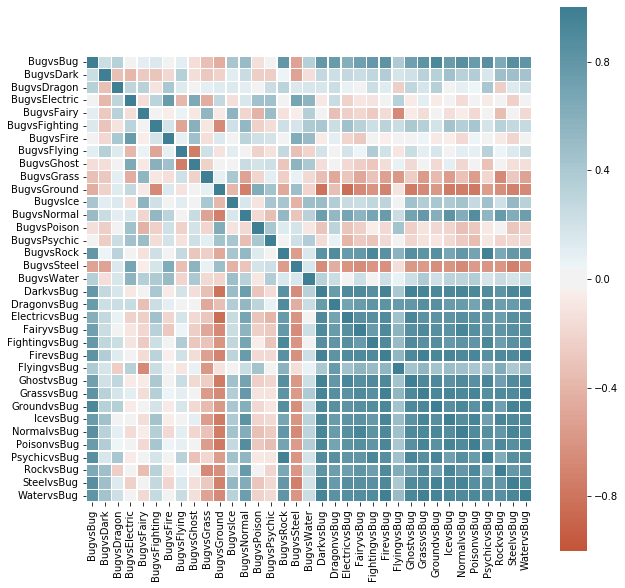

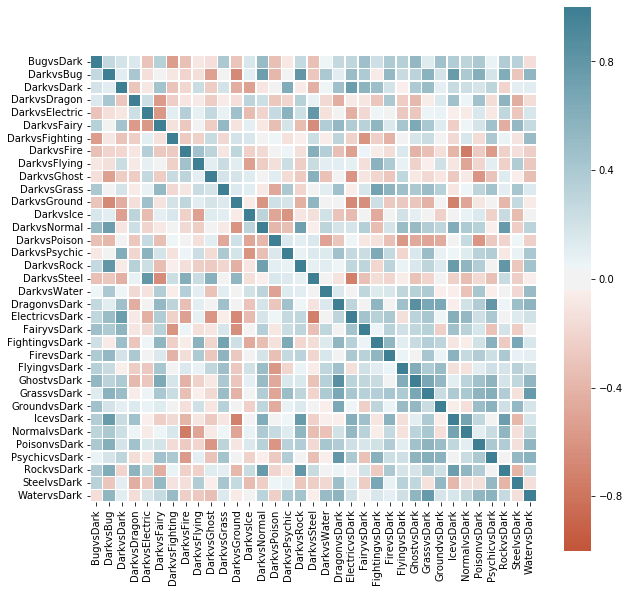

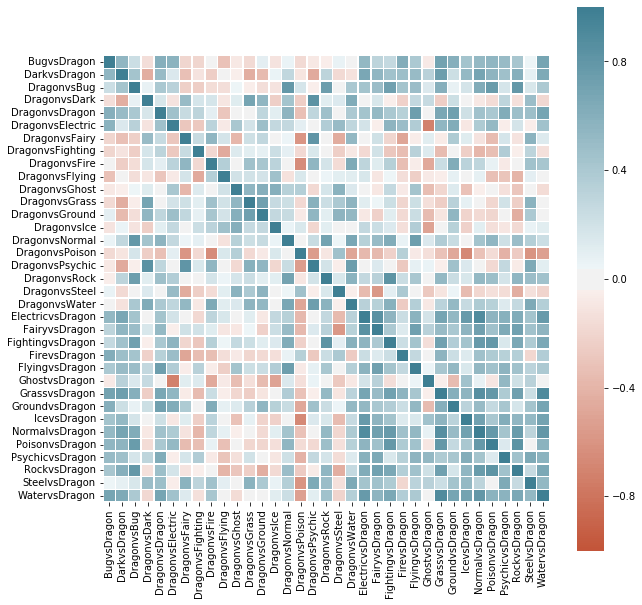

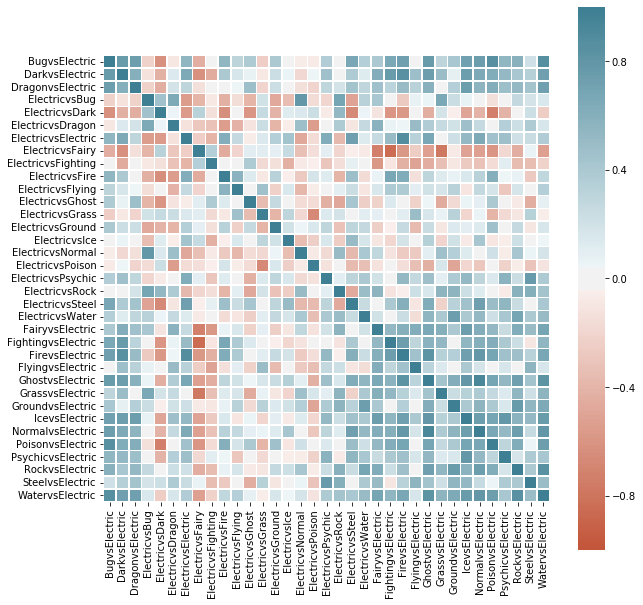

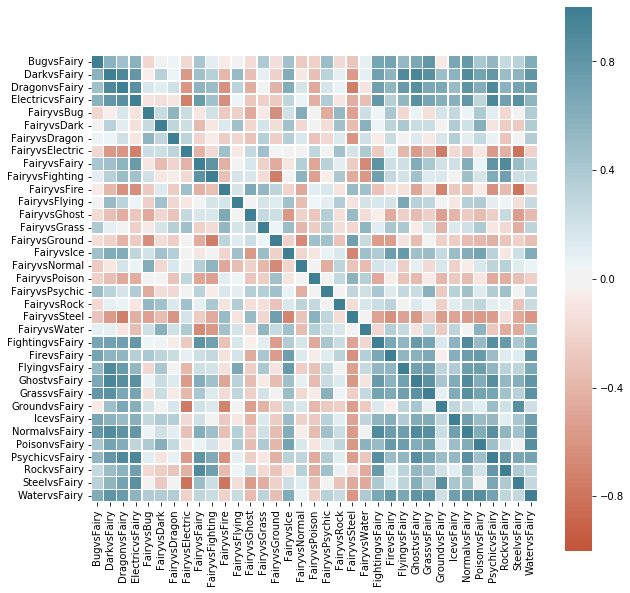

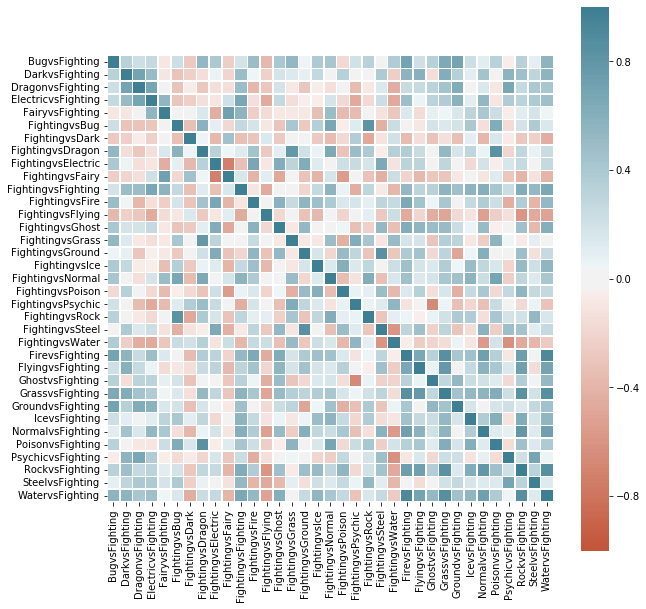

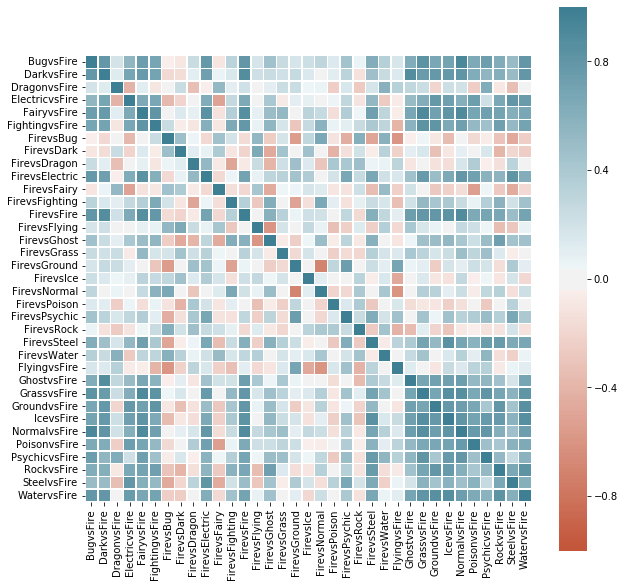

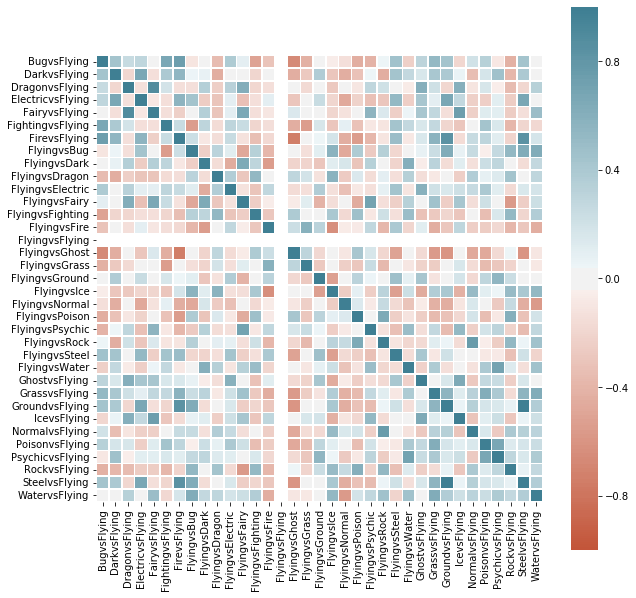

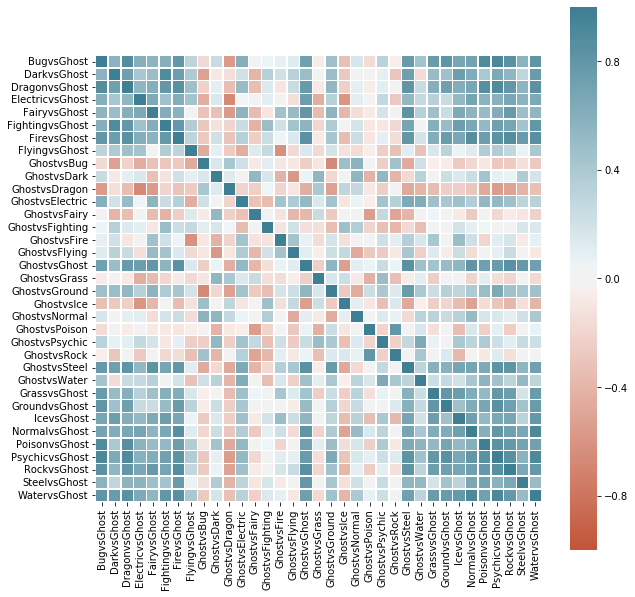

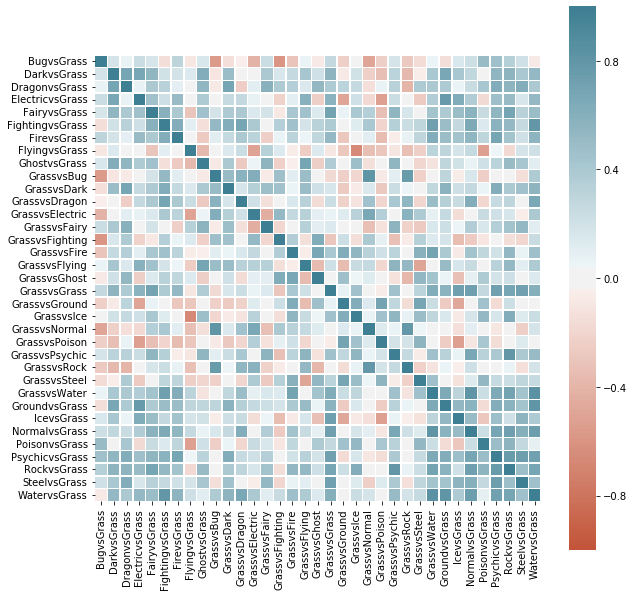

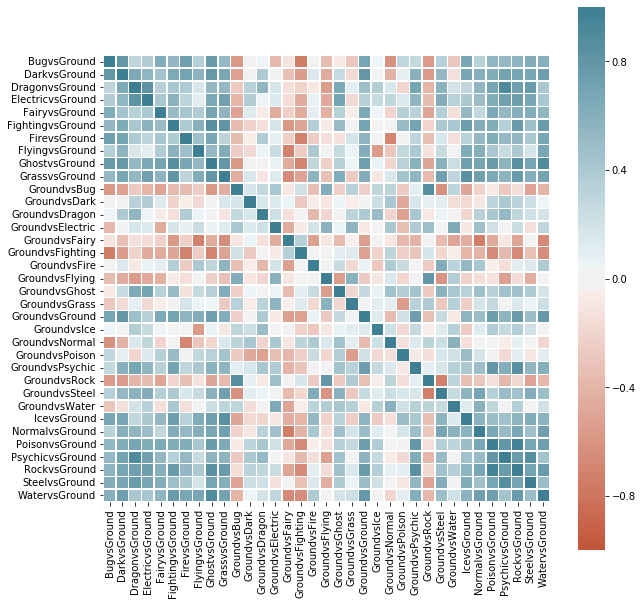

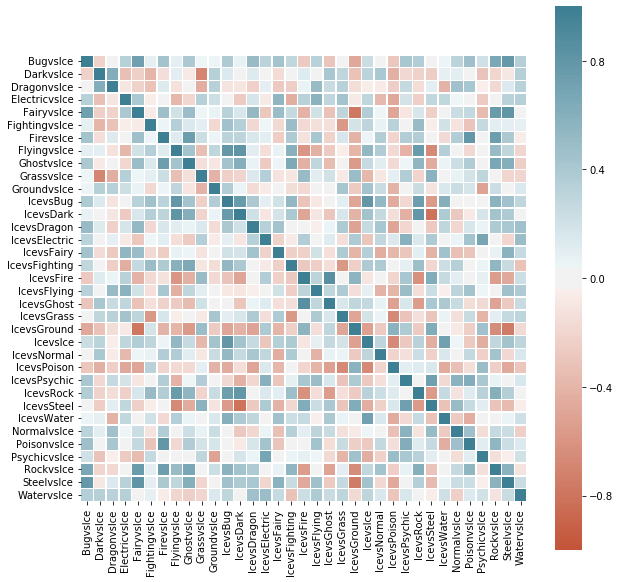

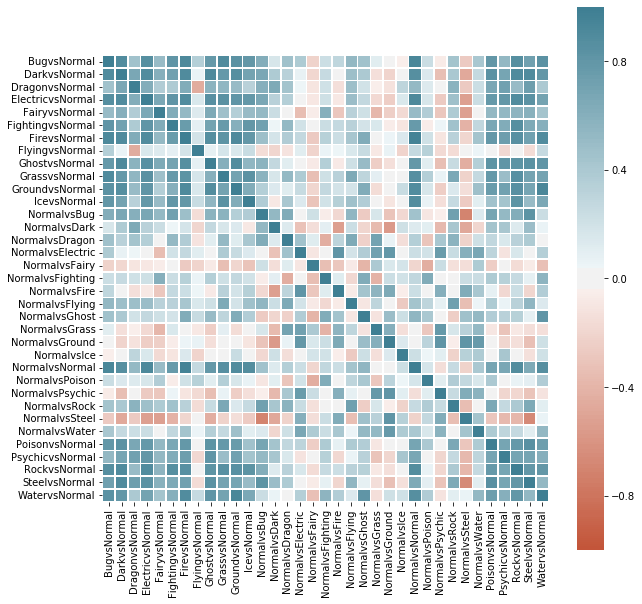

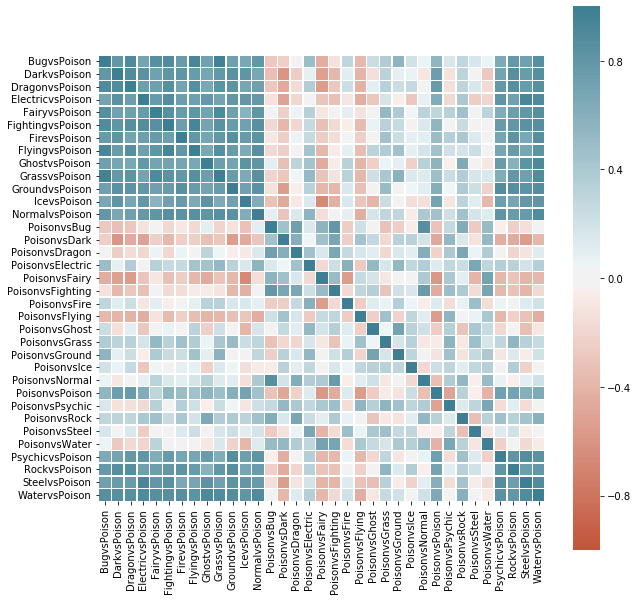

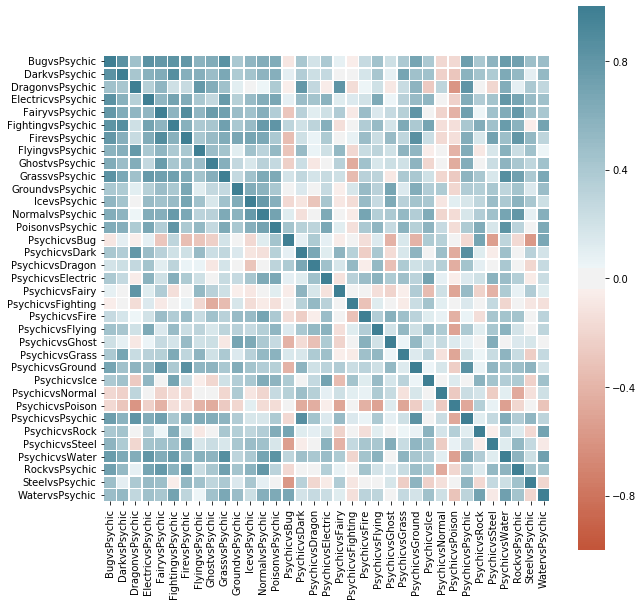

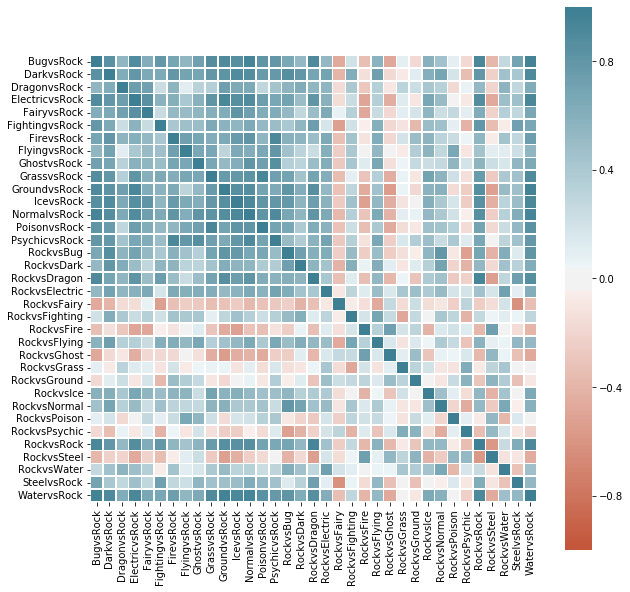

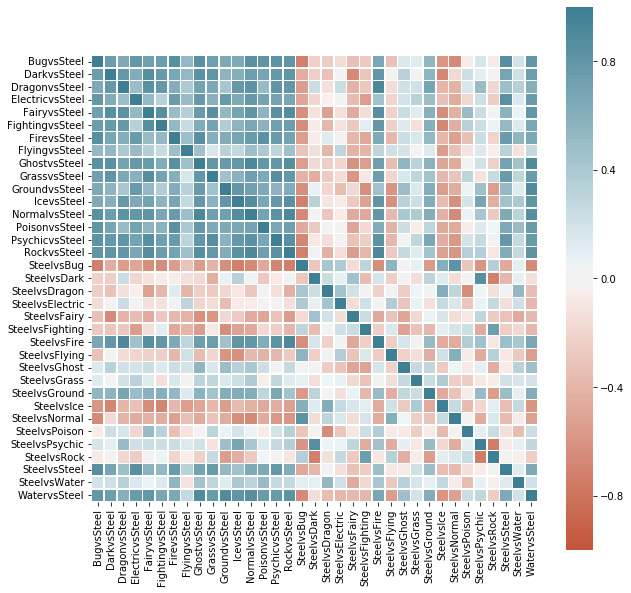

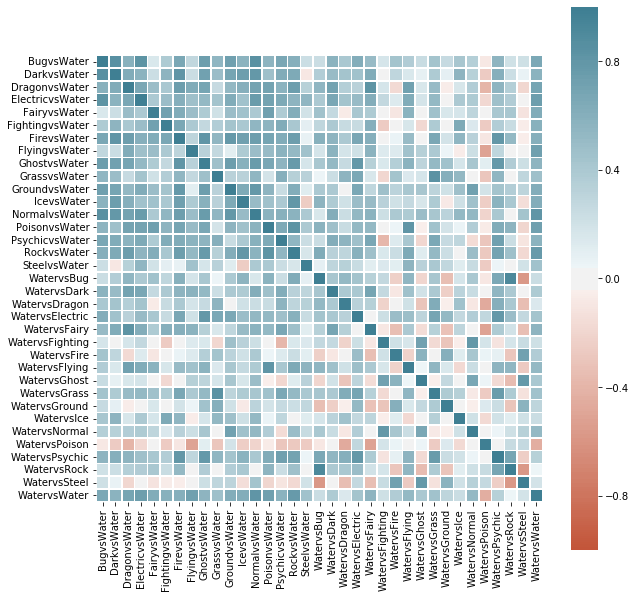

In [49]:
#----------Lost Type vs Win Type----------#
master = []
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]

for t in label1:
    
    label = []
    master = []
    for i in avg_data:
        for j in avg_data[i]:
            if(i == t or j == t):
                #print(i + " " + j)
                label.append(i + "vs" + j)
                master.append(avg_data[i][j]["data"])
            else:
                pass
    #print(master)
    corr = np.corrcoef(master)
    #print(corr)

    plt.figure(figsize=(10,10))
    ax = sns.heatmap(
        corr,
        vmin=-1,vmax=1,center=0,
        cmap=sns.diverging_palette(20,220,n=400),
        square=True,
        #annot=True,
        linewidths=.5
    )
    ax.set_xticklabels(
        label,
        rotation=90,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        label,
        verticalalignment='center',rotation=0
    );
    #plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/lost_win_pok/'+t+'png',bbox_inches='tight')





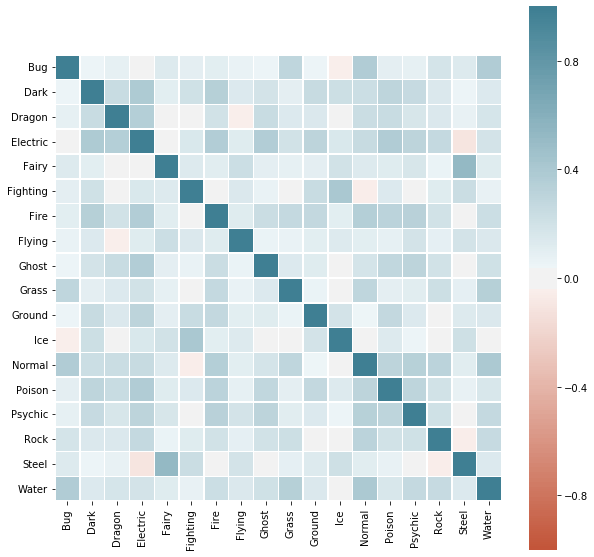

In [50]:
#GETTING ALL THE LOSS FOR EACH POKEMON TYPE FROM ALL SEASON 
#USING EACH TYPE AS VARIABLES
#EX: GRASS[season7[LOSS_against_all_type], season8[LOSS_against_all_type],...]
full = []
for i in label1:
    tot = []
    for j in season:
#        print(j + " " + i)
        for k in season[j][i]:
#            print(k,season[j][i][k])
            tot.append(season[j][i][k])
#    print(tot)
    full.append(tot)
    
#corr = np.corrcoef(full)
#print(full)
for i in range(len(full)):
    if len(full[i]) < 216:
        for j in range(216 - len(full[i])):
            full[i].append(0)
corr = np.corrcoef(full)
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=400),
    square=True,
    #annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    label1,
    rotation=90,
    horizontalalignment='center'
);
ax.set_yticklabels(
    label1,
    verticalalignment='center',rotation=0
);
#plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/aggregate_pokemon_type_loss.png',bbox_inches='tight')



In [51]:
#jsonprint(avg_data)
#jsonprint(season)

In [52]:
win_season = {}
#----Gets how many time each type defeated the specific type----#
for num in range(7,19):
    type_eff = {
        "Bug" : {},
        "Dark" : {},
        "Dragon" : {},
        "Electric" :{},
        "Fairy":{},
        "Fighting":{},
        "Fire":{},
        "Flying":{},
        "Ghost":{},
        "Grass":{},
        "Ground":{},
        "Ice":{},
        "Normal":{},
        "Poison":{},
        "Psychic":{},
        "Rock":{},
        "Steel":{},
        "Water":{}
    }
    filedata = "data" + str(num)+".json"
    
    with open(filedata) as file:
        data = json.load(file)
    
    for i in data:
        ind_pok = data[i]["rankingPokemonInfo"]["typeName1"]

        for j in range(len(data[i]["rankingPokemonSufferer"])):
            if data[i]["rankingPokemonSufferer"][j]["typeName1"] not in type_eff[ind_pok]:
                type_eff[ind_pok][data[i]["rankingPokemonSufferer"][j]["typeName1"]] = 1
            else:
                type_eff[ind_pok][data[i]["rankingPokemonSufferer"][j]["typeName1"]] = type_eff[ind_pok][data[i]["rankingPokemonSufferer"][j]["typeName1"]] + 1
           
    win_season["season" + str(num)] = type_eff

In [63]:
#jsonprint(win_season)
buff = {}
buff2 = {}
for i in win_season:
    for j in win_season[i]:
        tot_win = 0
        for k in win_season[i][j]:
            tot_win = tot_win + win_season[i][j][k]
        if j not in buff:
            buff[j] = []
            buff[j].append(tot_win)
        else:
            buff[j].append(tot_win)
        #print(i + " " + j + ":" , tot_win)
#jsonprint(buff)
#print(buff)
for i in season:
    for j in season[i]:
        tot_loss = 0
        for k in season[i][j]:
            tot_loss = tot_loss + season[i][j][k]
        if j not in buff2:
            buff2[j] = []
            buff2[j].append(tot_loss)
        else:
            buff2[j].append(tot_loss)
#jsonprint(season)
#jsonprint(buff2)
b = []
c = []
for i in buff2:
    b.append(sum(buff2[i]))
    c.append(sum(buff[i]))
for i in range(len(b)):
    print(label1[i],c[i]/b[i])
a = []
for i in buff:
    print(i + " win/season=",sum(buff[i])/len(buff[i]))
    a.append(sum(buff[i])/len(buff[i]))
a.sort()
print(a)

Bug 0.7506024096385542
Dark 0.852326968973747
Dragon 0.8171695402298851
Electric 0.9147880041365046
Fairy 0.802192326856004
Fighting 0.9025009061254078
Fire 0.8773318258903335
Flying 0.8612612612612612
Ghost 0.8125915080527086
Grass 0.7789429530201343
Ground 0.896042528056704
Ice 0.8932107496463932
Normal 0.844626168224299
Poison 0.8105030053780449
Psychic 0.8055394150687585
Rock 0.855143031040779
Steel 0.8884331419196062
Water 0.8430700861031386
Bug win/season= 415.3333333333333
Dark win/season= 238.08333333333334
Dragon win/season= 189.58333333333334
Electric win/season= 368.5833333333333
Fairy win/season= 134.16666666666666
Fighting win/season= 207.5
Fire win/season= 388.0
Flying win/season= 39.833333333333336
Ghost win/season= 231.25
Grass win/season= 464.25
Ground win/season= 252.83333333333334
Ice win/season= 210.5
Normal win/season= 662.75
Poison win/season= 213.5
Psychic win/season= 346.5833333333333
Rock win/season= 351.25
Steel win/season= 180.5
Water win/season= 758.83333333

In [14]:
#----------GETS TYPE DATA FROM ALL SEASON AND STORE IN ARRAY----------#
#{"Bug":
#       "Bug":{"data":[season7, season8, ...],"avg"}
#}

win_avg_data = {}
for i in type_eff:
    if i not in win_avg_data:
        win_avg_data[i] = {}
    for j in type_eff:
        defeated = []
        for k in win_season:
            if(j not in win_season[k][i]):
                defeated.append(0)
            else:
                defeated.append(win_season[k][i][j])
        if(j not in win_avg_data[i]):
            win_avg_data[i][j] = {
                "data":defeated,        
                "avg":sum(defeated)/11,
            }

In [15]:
jsonprint(win_avg_data)

{
    "Bug": {
        "Bug": {
            "avg": 17.0,
            "data": [
                8,
                26,
                12,
                15,
                14,
                21,
                6,
                10,
                15,
                38,
                17,
                5
            ]
        },
        "Dark": {
            "avg": 9.181818181818182,
            "data": [
                9,
                12,
                9,
                6,
                5,
                8,
                10,
                7,
                4,
                12,
                8,
                11
            ]
        },
        "Dragon": {
            "avg": 27.363636363636363,
            "data": [
                18,
                24,
                28,
                22,
                37,
                28,
                22,
                23,
                33,
                27,
                18,
                21
      

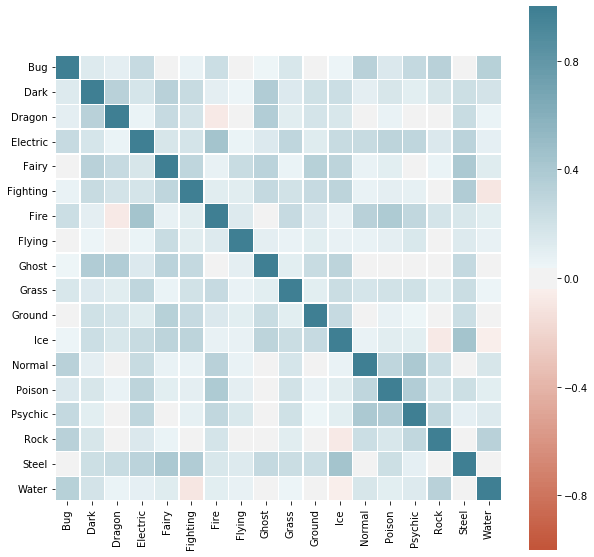

In [246]:
#GETTING ALL THE WIN FOR EACH POKEMON TYPE FROM ALL SEASON 
#USING EACH TYPE AS VARIABLES
#EX: GRASS[season7[LOSS_against_all_type], season8[LOSS_against_all_type],...]
#AND THEN FINDING THE CORRELATION
full = []
for i in label1:
    tot = []
    for j in win_season:
#        print(j + " " + i)
        for k in win_season[j][i]:
#            print(k,season[j][i][k])
            tot.append(win_season[j][i][k])
#    print(tot)
    full.append(tot)
    
for i in range(len(full)):
    if len(full[i]) < 216:
        for j in range(216 - len(full[i])):
            full[i].append(0)
            
corr = np.corrcoef(full)
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=400),
    square=True,
    #annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    label1,
    rotation=90,
    horizontalalignment='center'
);
ax.set_yticklabels(
    label1,
    verticalalignment='center',rotation=0
);

#plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/aggregate_pok_type_win.png',bbox_inches='tight')


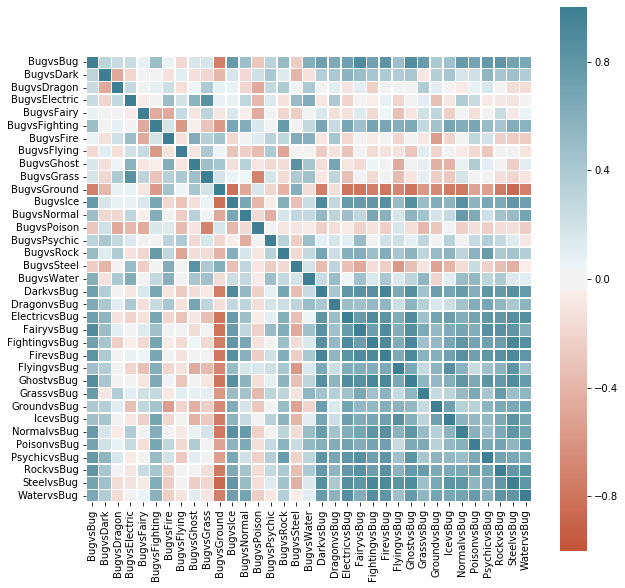

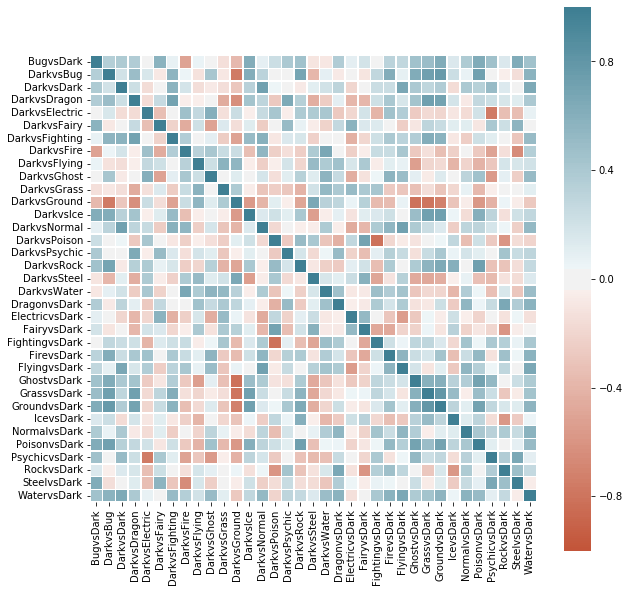

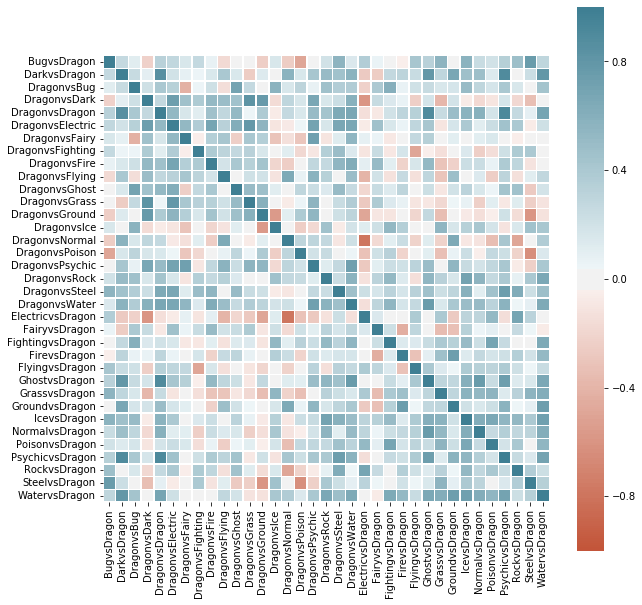

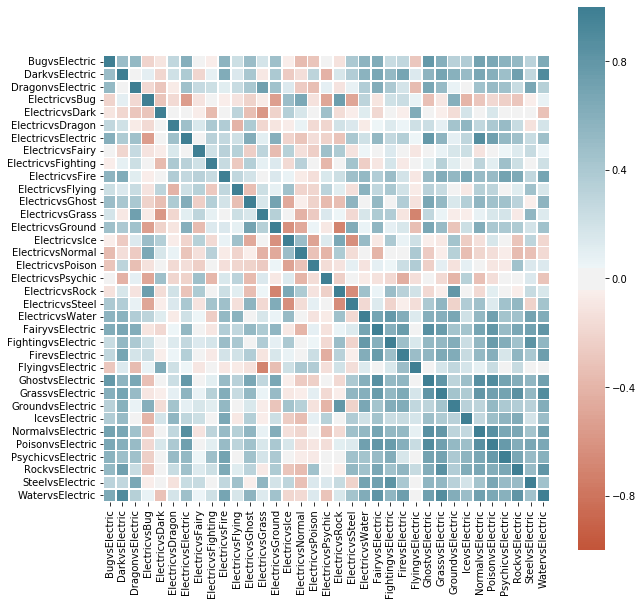

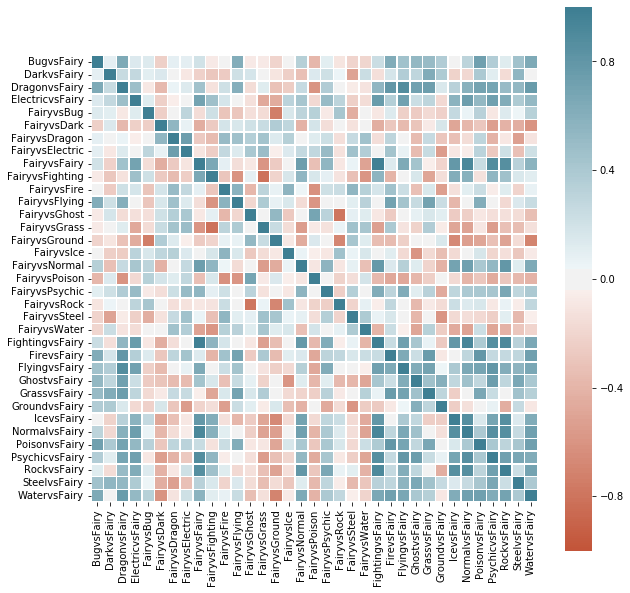

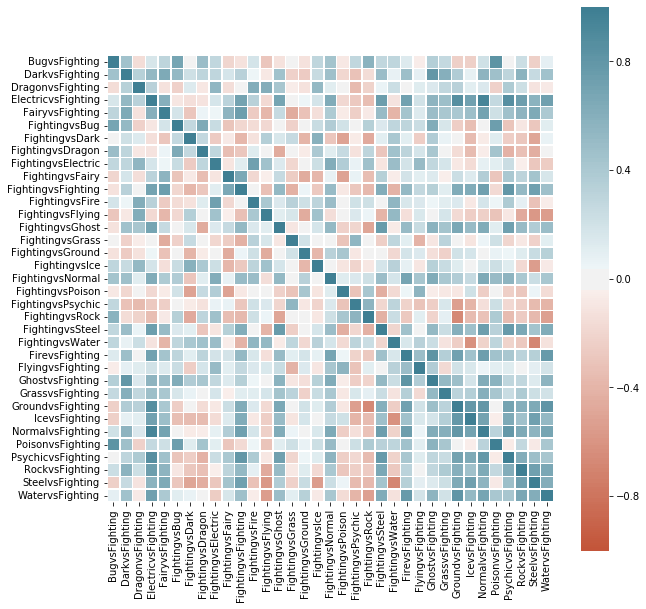

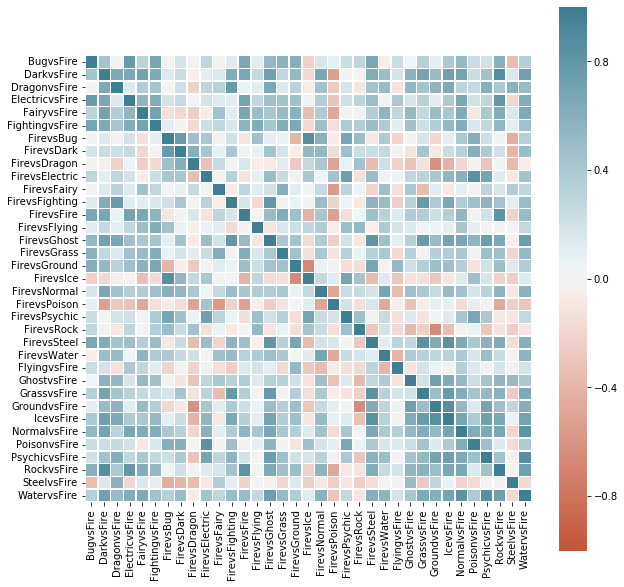

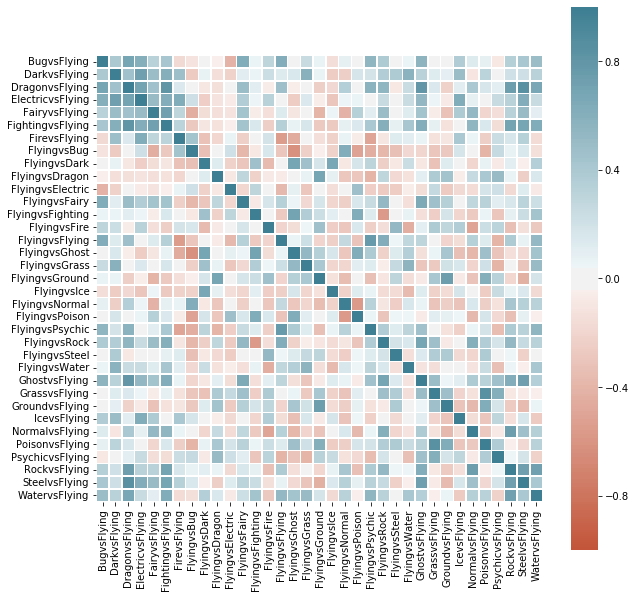

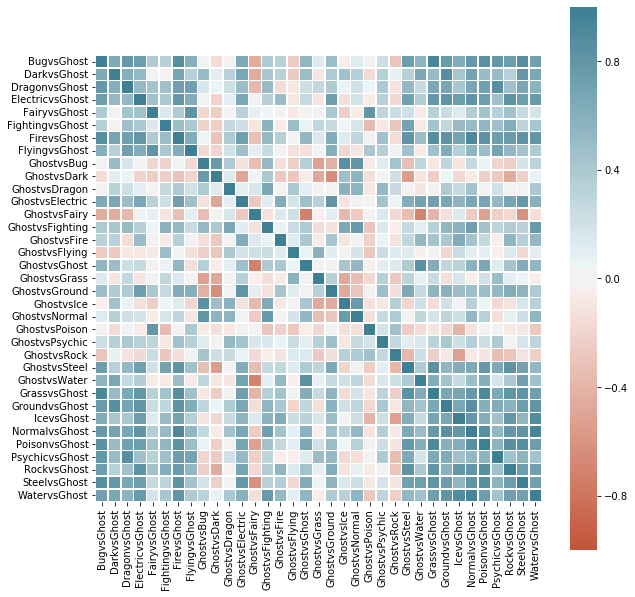

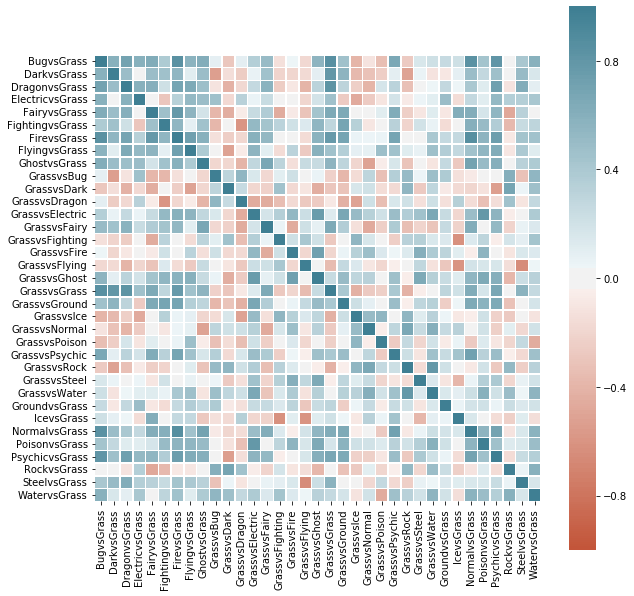

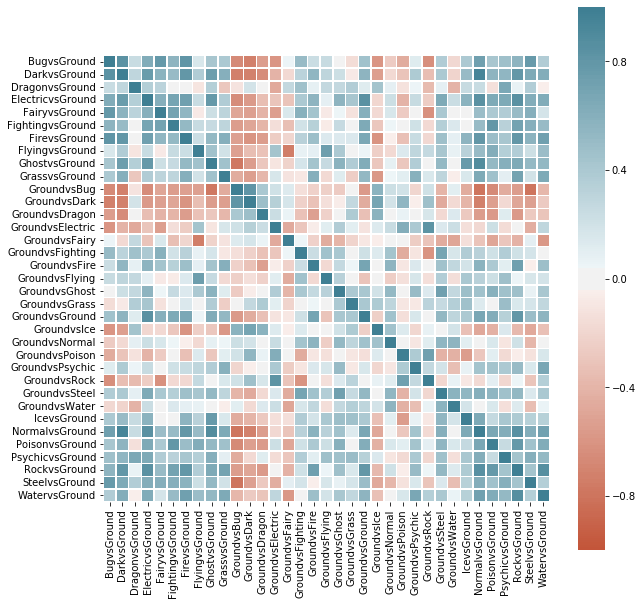

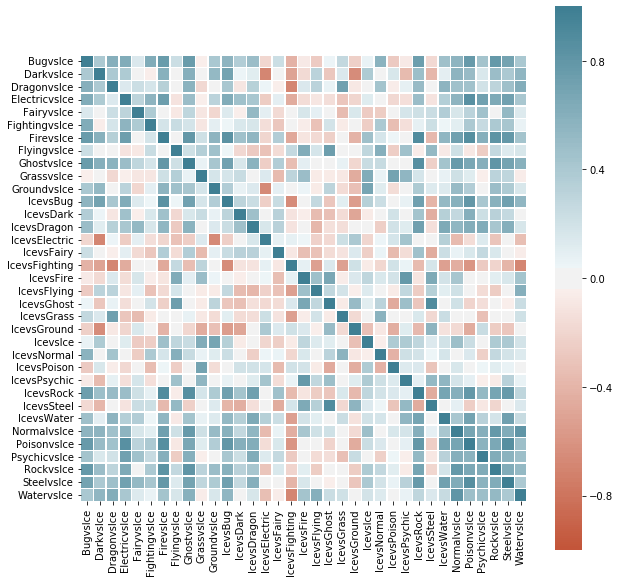

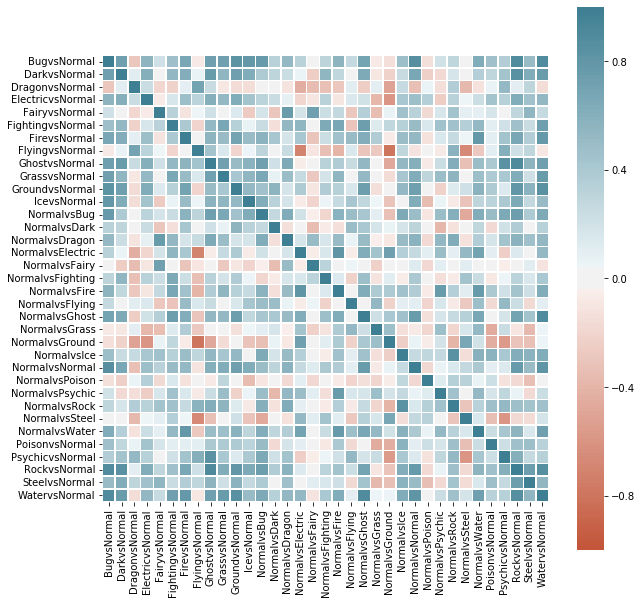

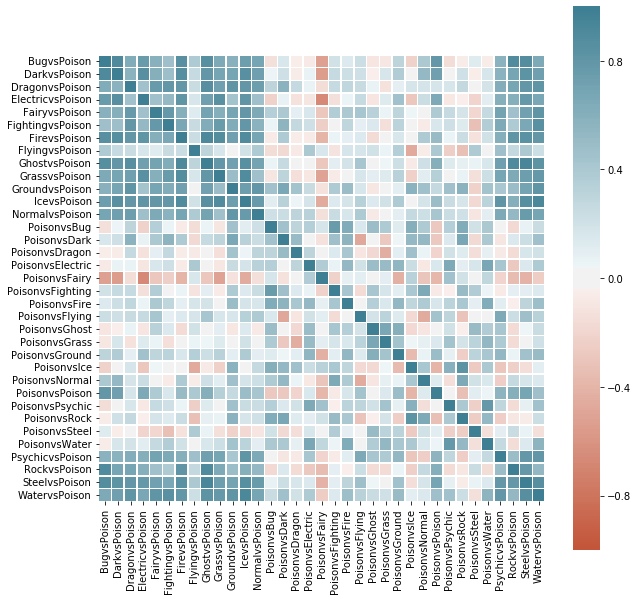

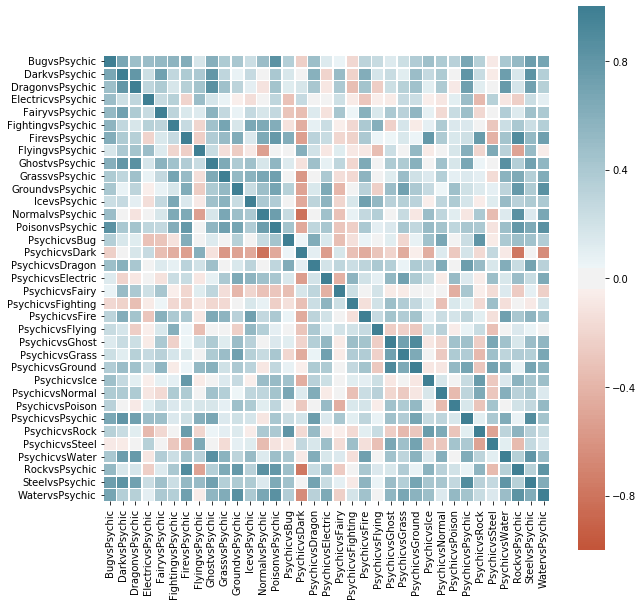

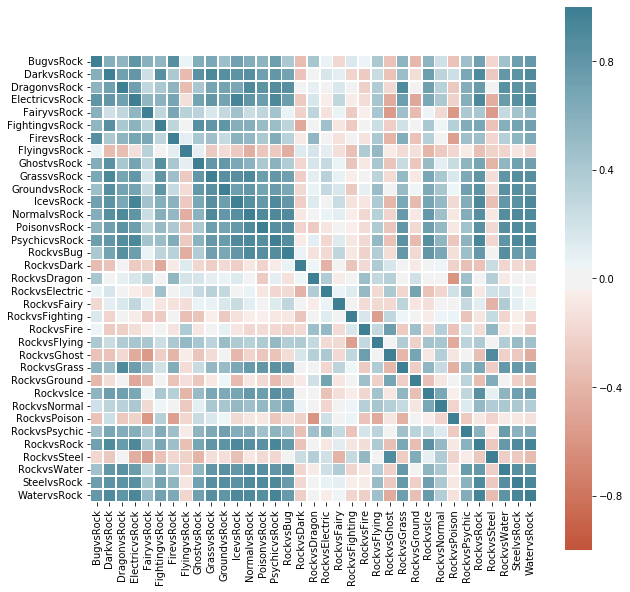

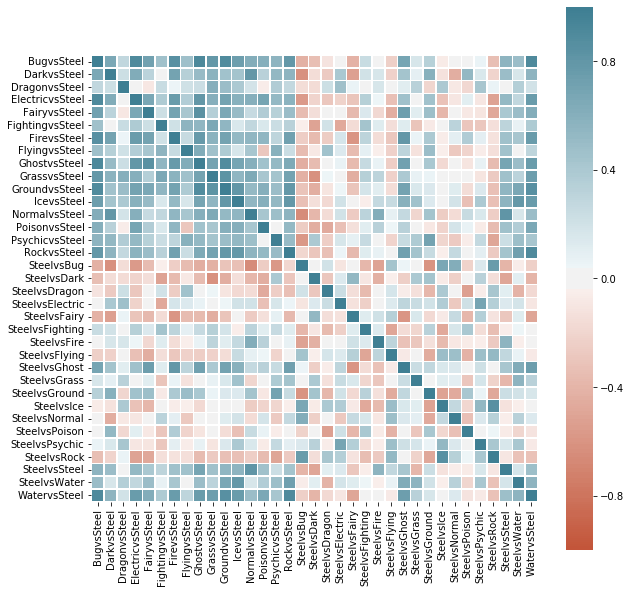

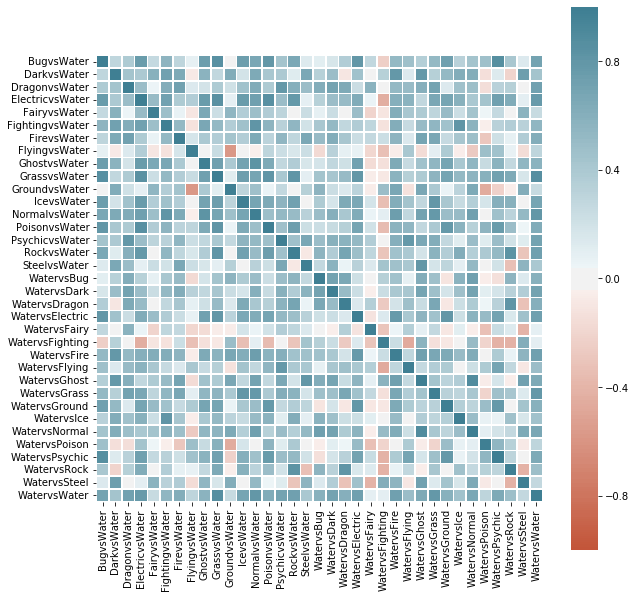

In [247]:
#win_avg_data["Bug"]["data"] vs 
master = []
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]

for t in label1:
    
    label = []
    master = []
    for i in win_avg_data:
        for j in win_avg_data[i]:
            if(i == t or j == t):
                #print(i + " " + j)
                label.append(i + "vs" + j)
                master.append(win_avg_data[i][j]["data"])
            else:
                pass
    #print(master)
    corr = np.corrcoef(master)
    #print(corr)

    plt.figure(figsize=(10,10))
    ax = sns.heatmap(
        corr,
        vmin=-1,vmax=1,center=0,
        cmap=sns.diverging_palette(20,220,n=400),
        square=True,
        #annot=True,
        linewidths=.5
    )
    ax.set_xticklabels(
        label,
        rotation=90,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        label,
        verticalalignment='center',rotation=0
    );
    #plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/win_lost_pok/'+t+'.png',bbox_inches='tight')


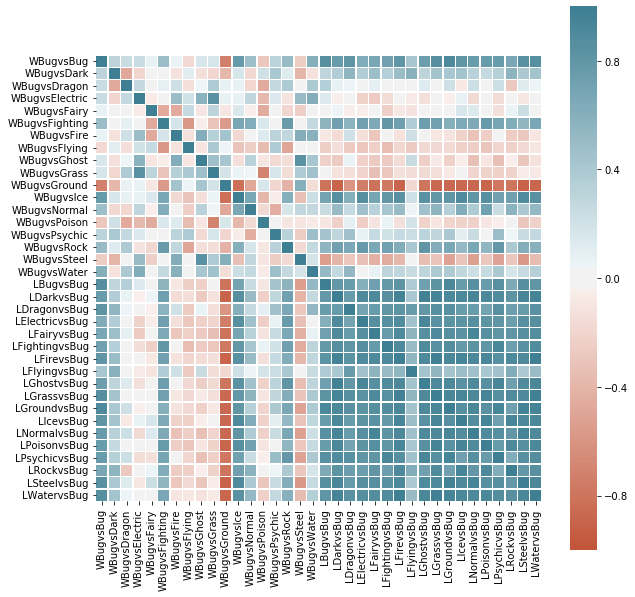

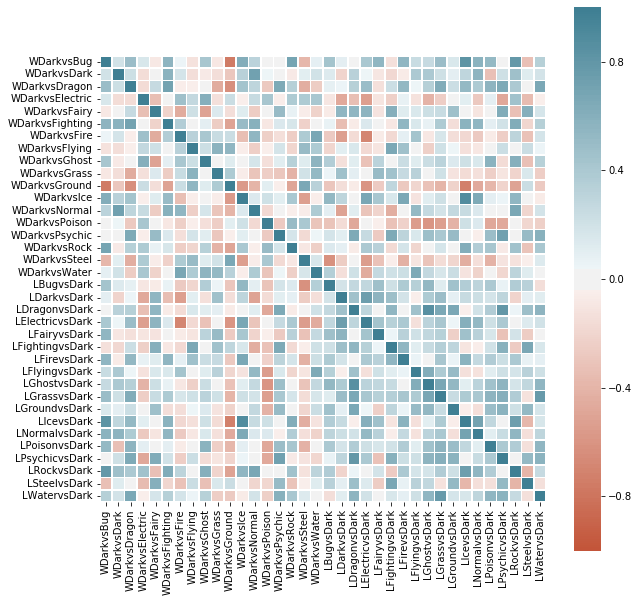

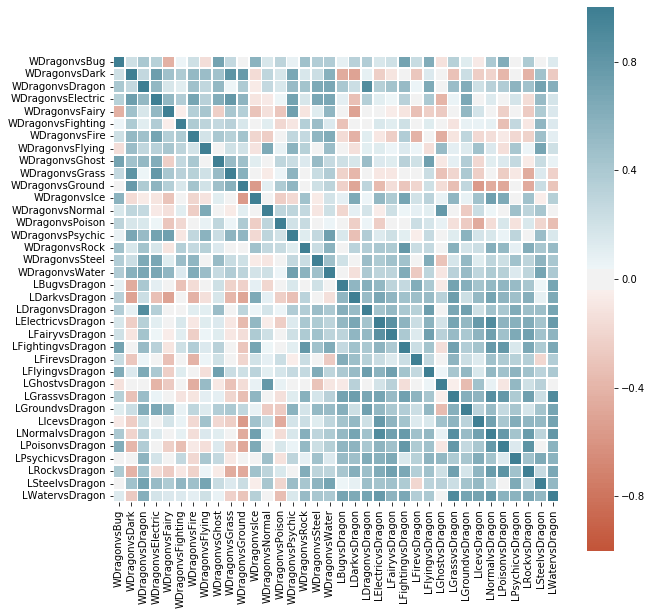

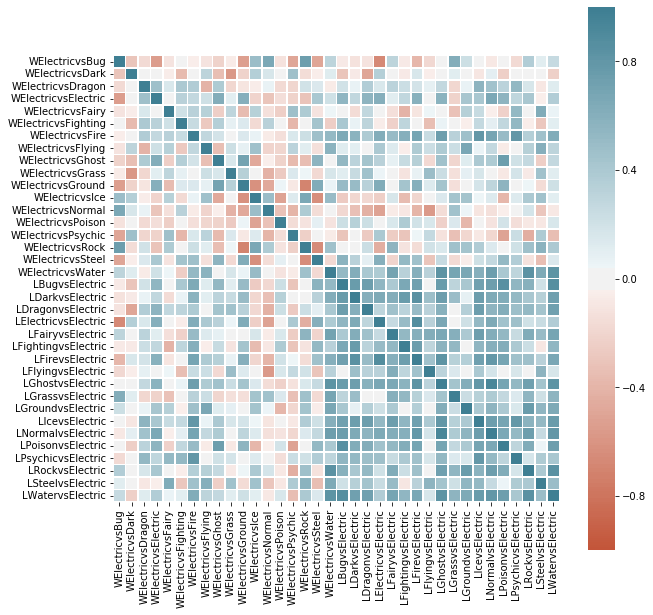

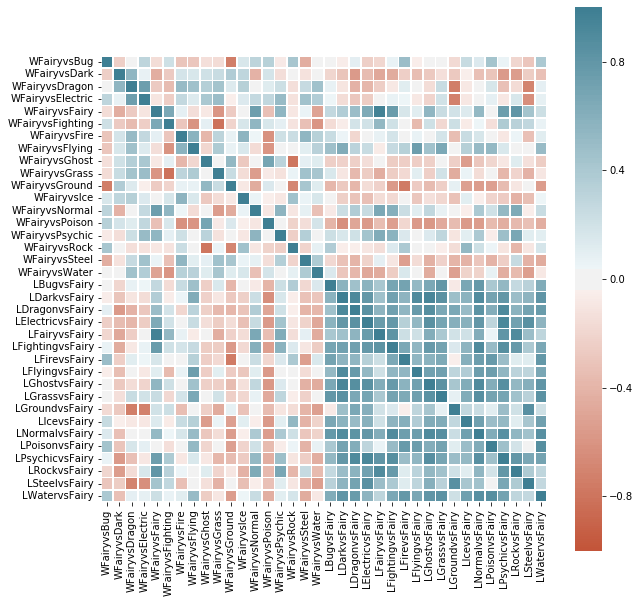

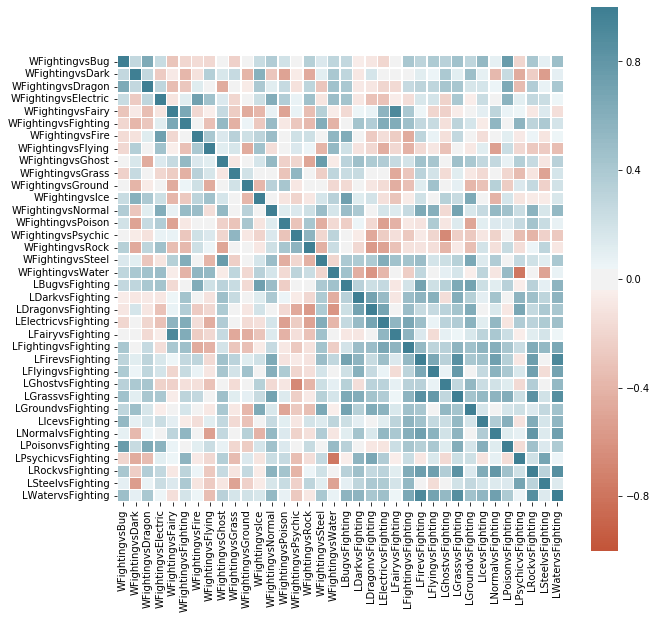

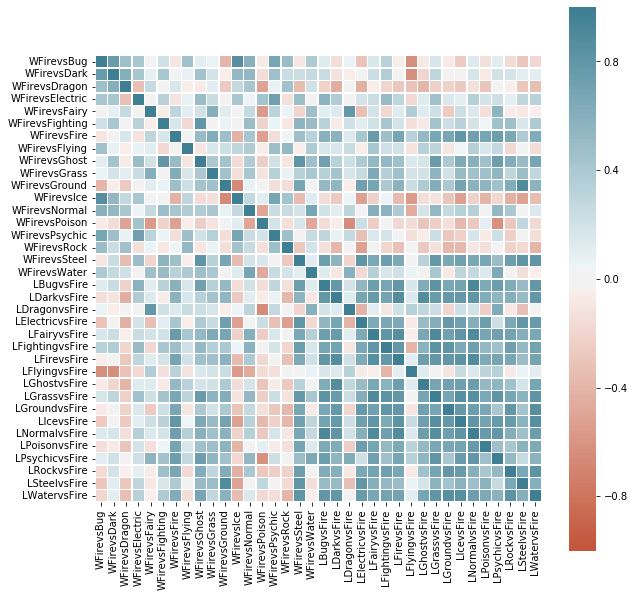

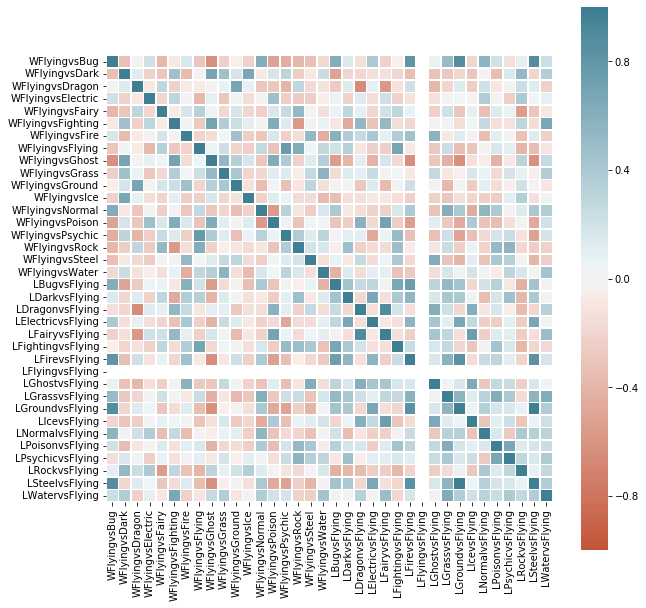

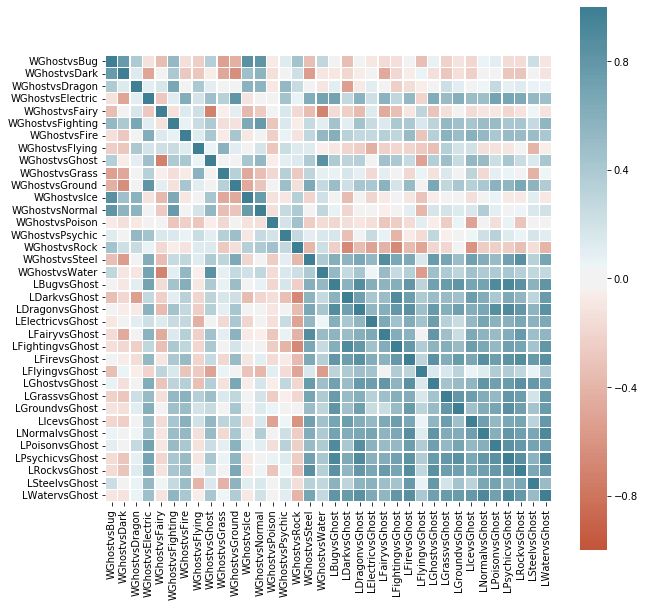

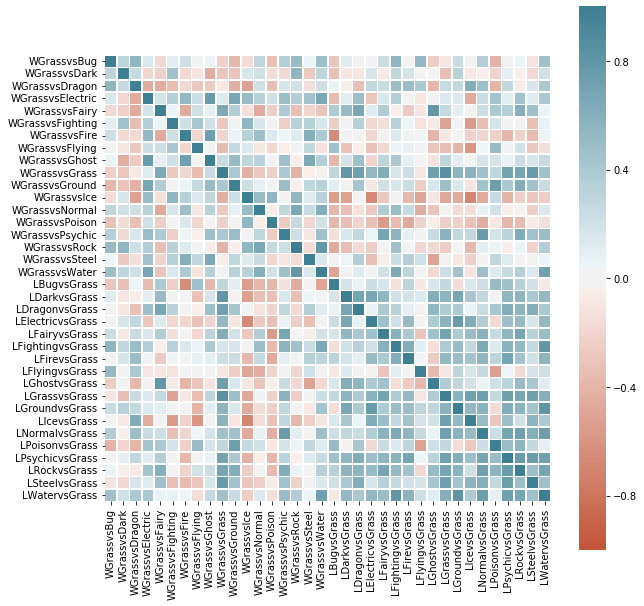

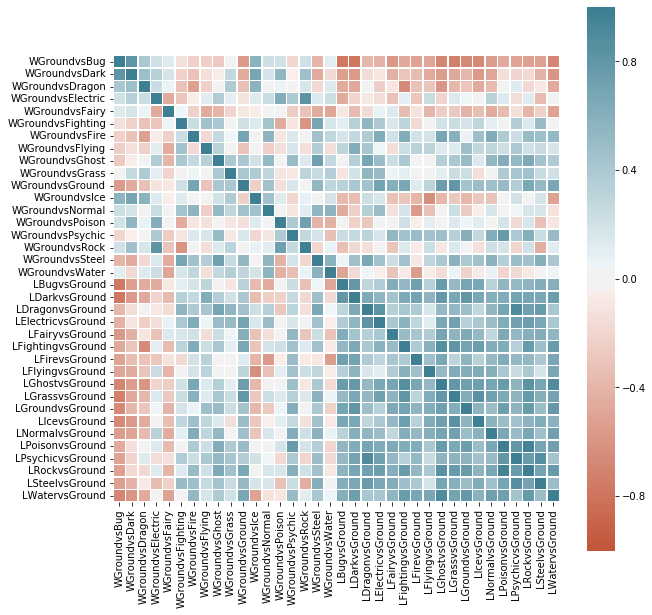

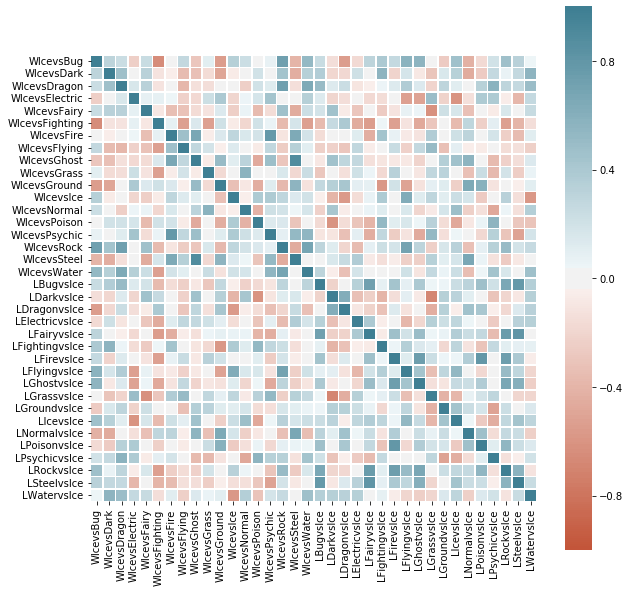

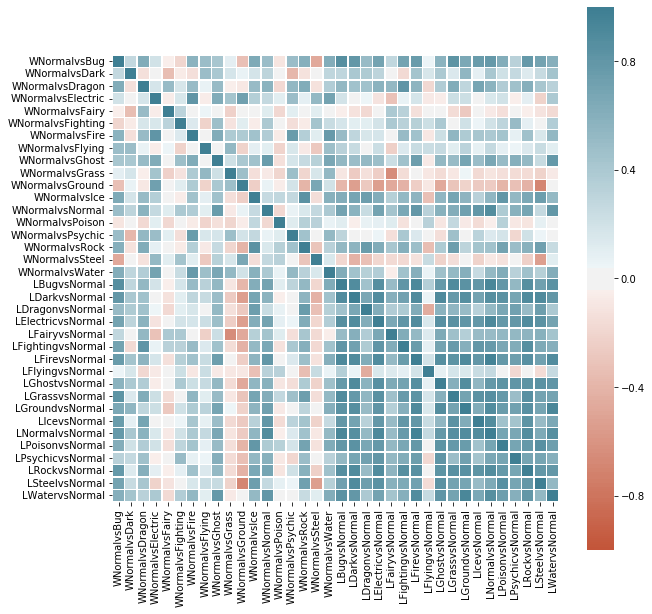

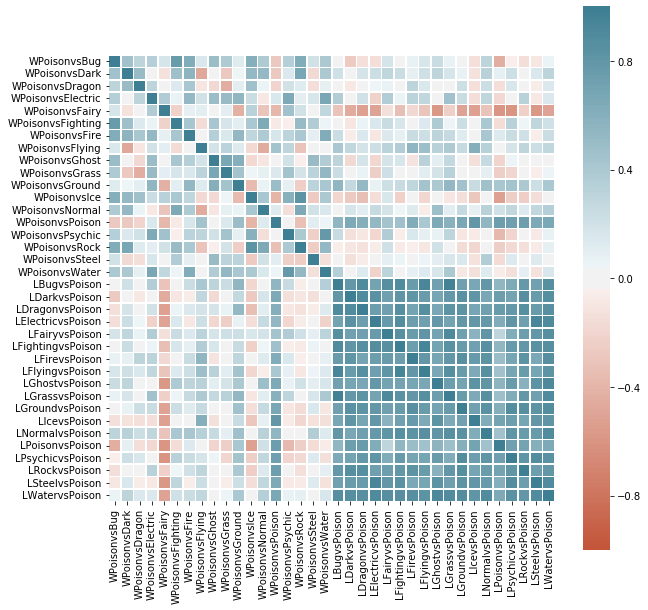

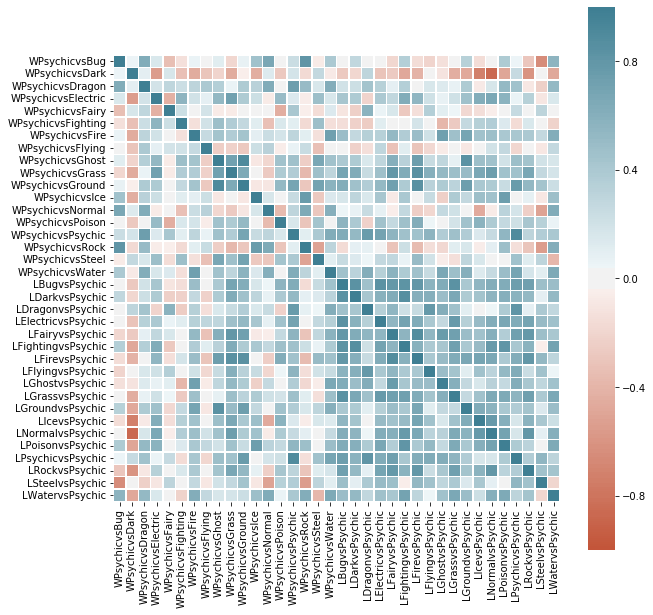

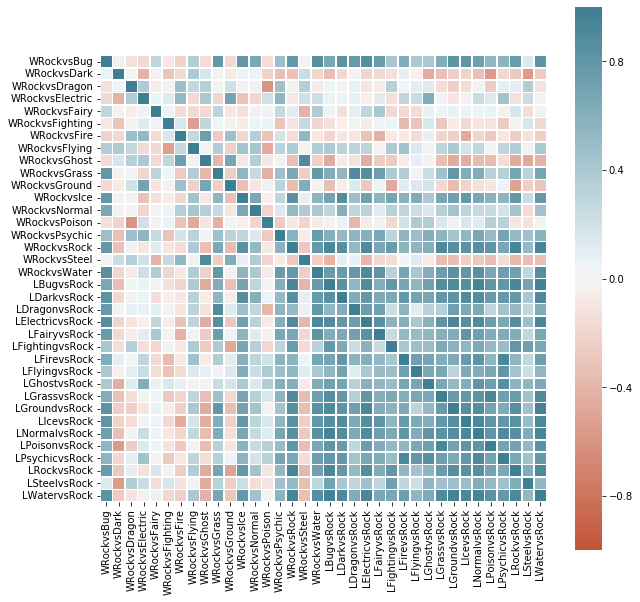

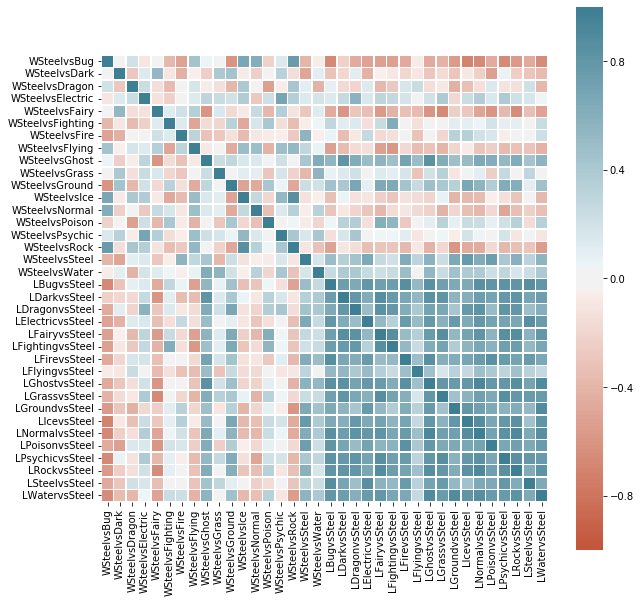

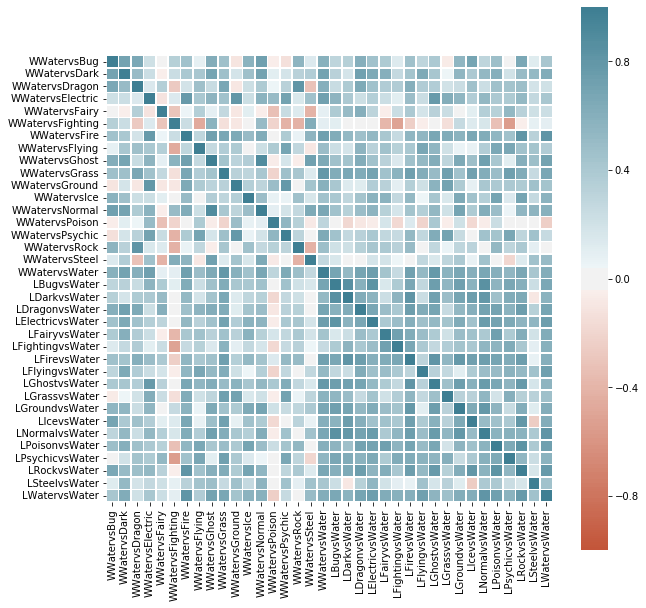

In [248]:
#Get win_avg_data["Bug"]["Bug"]["data"] Bug defeated Bug data for all season
#Get win_avg_data["Fire"]["Bug"]["data"] Fire defeated Bug data for all season
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]
for t in label1:
    master = []
    label = []
    for i in win_avg_data:
        for j in win_avg_data[i]:
            if i == t:
                master.append(win_avg_data[i][j]["data"])
                label.append("W"+i+"vs"+j)
            else:
                pass
    for i in avg_data:
        for j in avg_data[i]:
            if j == t:
                master.append(avg_data[i][j]["data"])
                a = label.append("L"+i+"vs"+j)
                
            else:
                pass
            
    corr = np.corrcoef(master)
    #print(corr)

    plt.figure(figsize=(10,10))
    ax = sns.heatmap(
        corr,
        vmin=-1,vmax=1,center=0,
        cmap=sns.diverging_palette(20,220,n=400),
        square=True,
        #annot=True,
        linewidths=.5
    )
    ax.set_xticklabels(
        label,
        rotation=90,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        label,
        verticalalignment='center',rotation=0
    );
    #plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/win_lost_comp_type/'+t+'.png',bbox_inches='tight')



In [249]:
move_id = {
    1:"Normal",
    2:"Fighting",
    3:"Fire",
    4:"Ice",
    5:"Electric",
    6:"Flying",
    7:"Grass",
    8:"Ground",
    9:"Poison",
    10:"Bug",
    11:"Dark",
    12:"Water",
    13:"Psychic",
    14:"Dragon",
    15:"Rock",
    16:"Ghost",
    17:"Steel",
    18:"Fairy"
}

In [250]:
season_w = {}
season = {}

#----Get the type of move which it lost too----#
#{
# "Bug"{
#       "Ice":10
#       "Fire":29
#  }
#}
#Bug lost too 10 Ice moves, 29 Fire moves
for num in range(7,19):
    move_eff = {
        "Bug" : {},
        "Dark" : {},
        "Dragon" : {},
        "Electric" :{},
        "Fairy":{},
        "Fighting":{},
        "Fire":{},
        "Flying":{},
        "Ghost":{},
        "Grass":{},
        "Ground":{},
        "Ice":{},
        "Normal":{},
        "Poison":{},
        "Psychic":{},
        "Rock":{},
        "Steel":{},
        "Water":{}
    }
    filedata = "data" + str(num)+".json"
    
    with open(filedata) as file:
        data = json.load(file)
    
    print(filedata)
    
    for i in data:
        ind_pok = data[i]["rankingPokemonInfo"]["typeName1"]
        if data[i]["rankingPokemonDownWaza"] == None:
            pass
        else:
            for j in range(len(data[i]["rankingPokemonDownWaza"])):
                if data[i]["rankingPokemonDownWaza"][j]["typeId"]!= 0:
                    if move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]] not in move_eff[ind_pok]:
                        
                        move_eff[ind_pok][move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]]] = 1
                    else:
                        move_eff[ind_pok][move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]]] = move_eff[ind_pok][move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]]] + 1
    season["season" + str(num)] = move_eff

data7.json
data8.json
data9.json
data10.json
data11.json
data12.json
data13.json
data14.json
data15.json
data16.json
data17.json
data18.json


In [251]:
#jsonprint(season)

In [252]:
move_avg_data = {}
for i in move_eff:
    if i not in move_avg_data:
        move_avg_data[i] = {}
    for j in move_eff:
        defeated = []
        for k in season:
            if(j not in season[k][i]):
                defeated.append(0)
            else:
                defeated.append(season[k][i][j])
        if(j not in move_avg_data[i]):
            move_avg_data[i][j] = {
                "data":defeated,        
                "avg":sum(defeated)/11,
            }
        

In [253]:
#jsonprint(move_avg_data["Flying"])

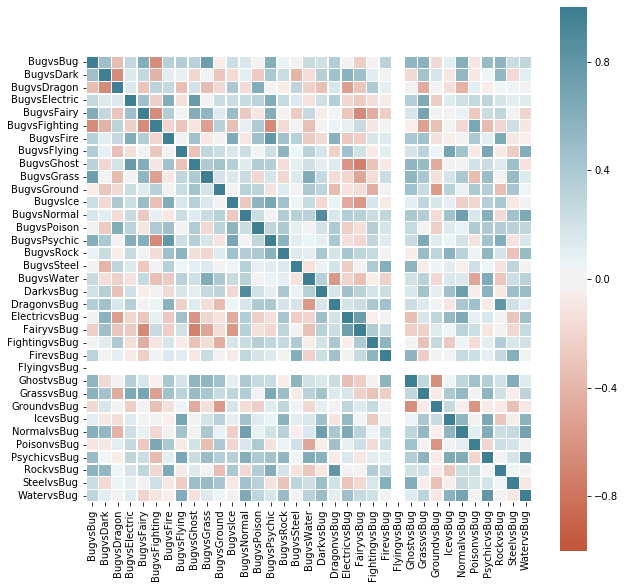

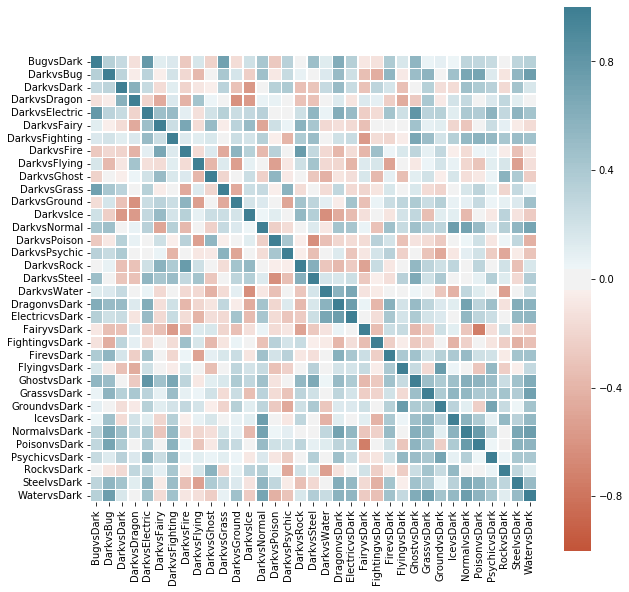

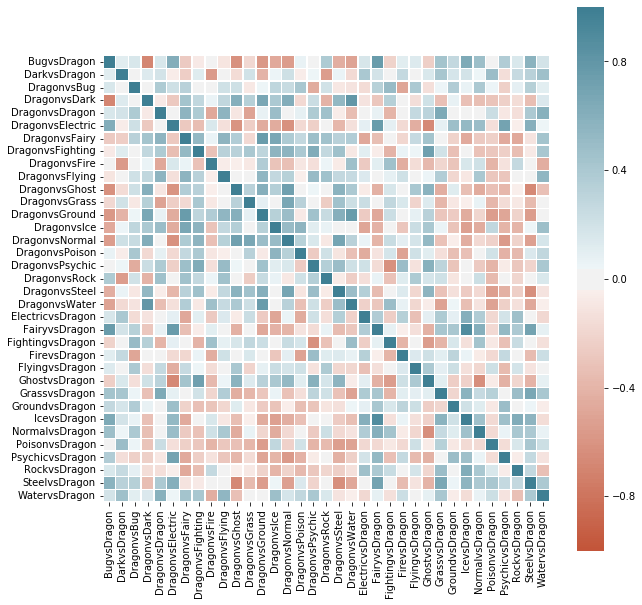

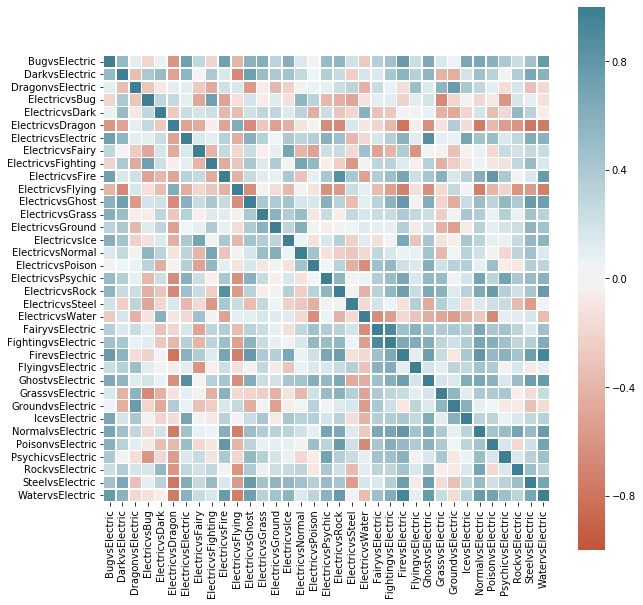

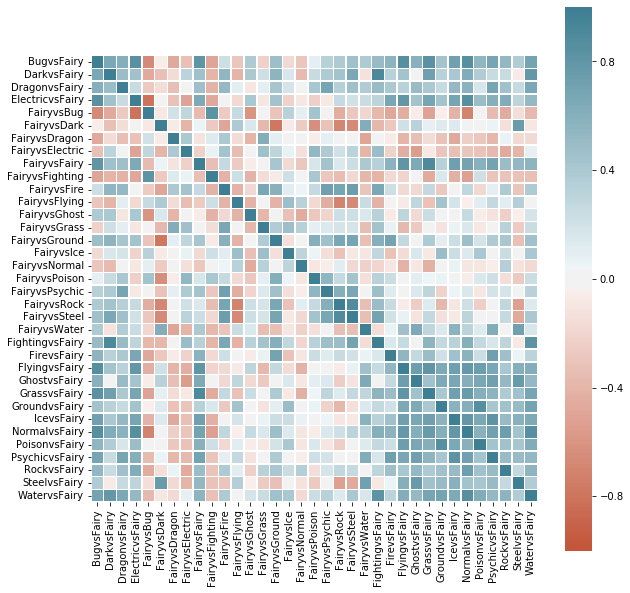

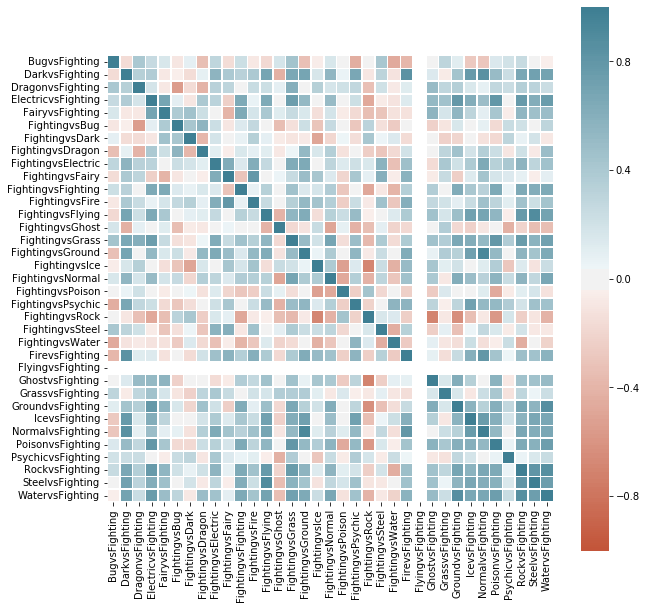

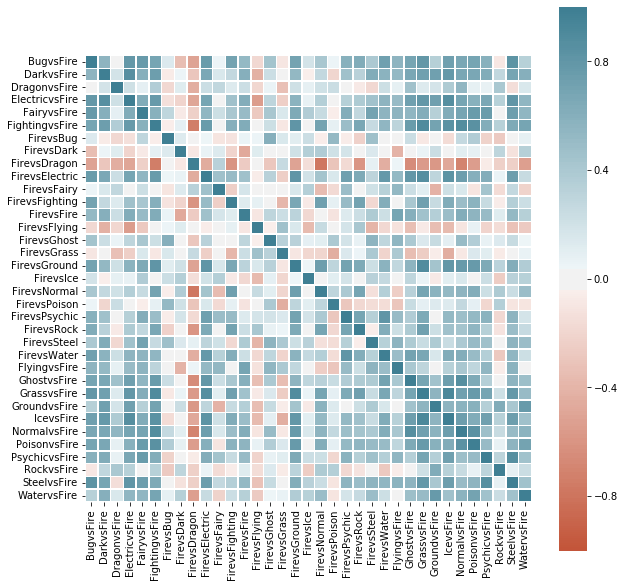

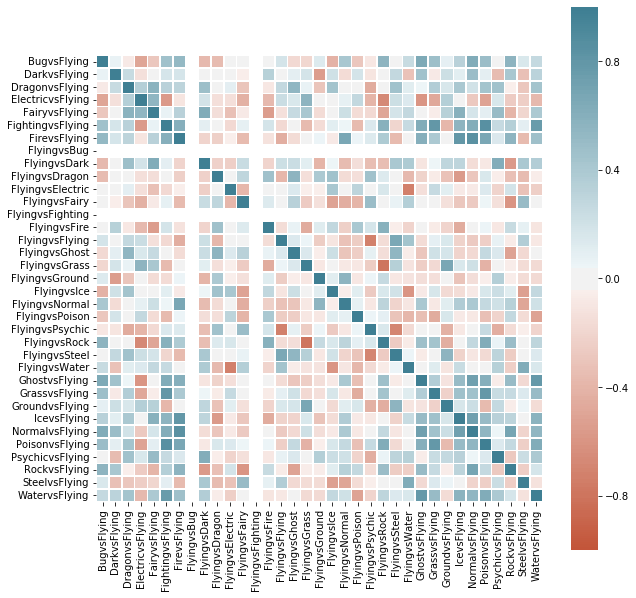

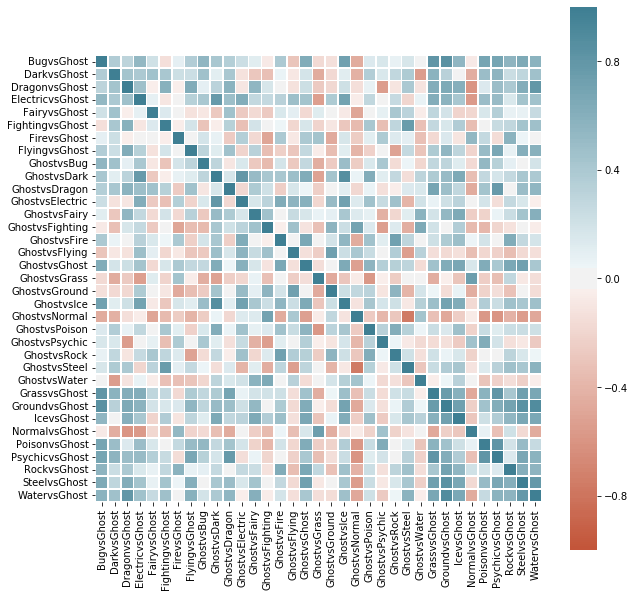

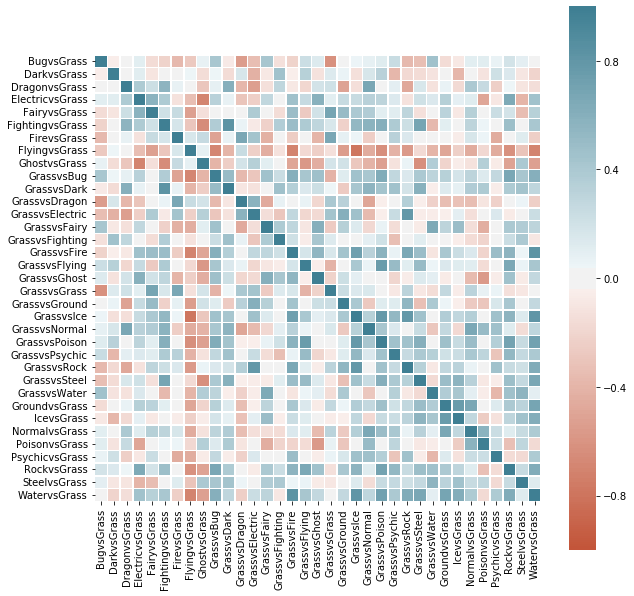

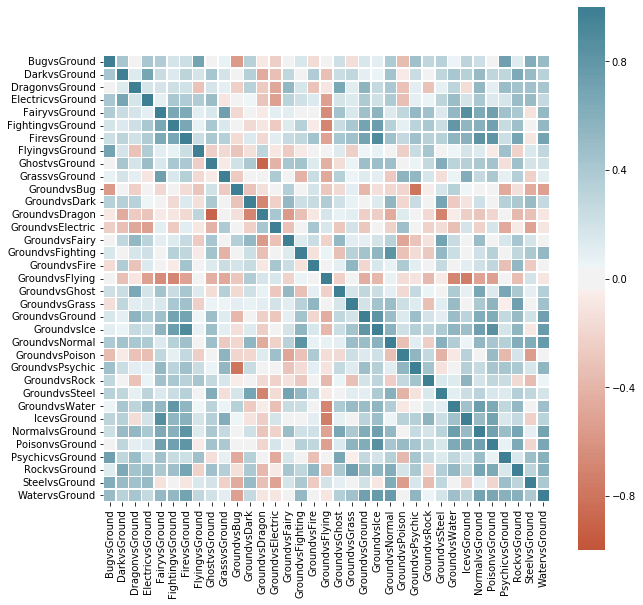

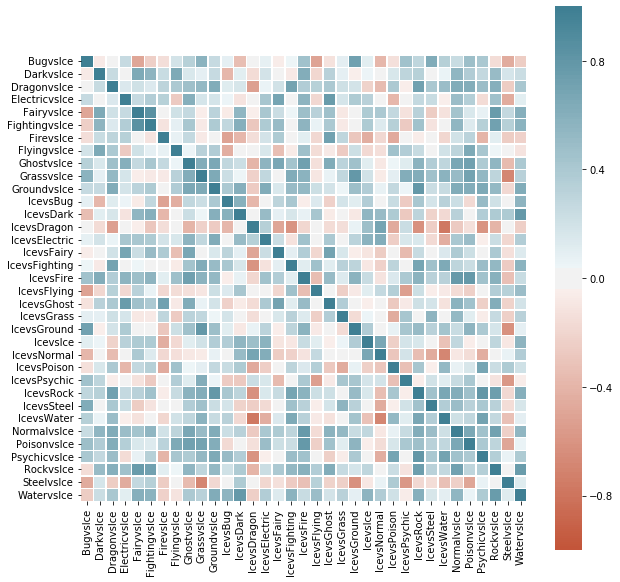

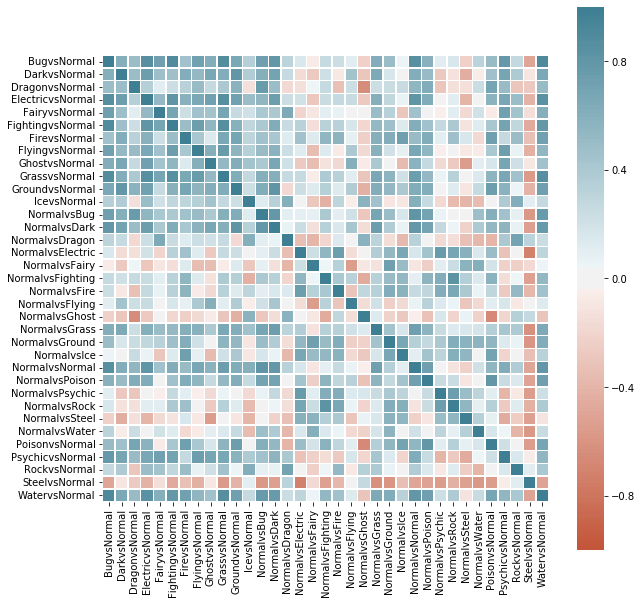

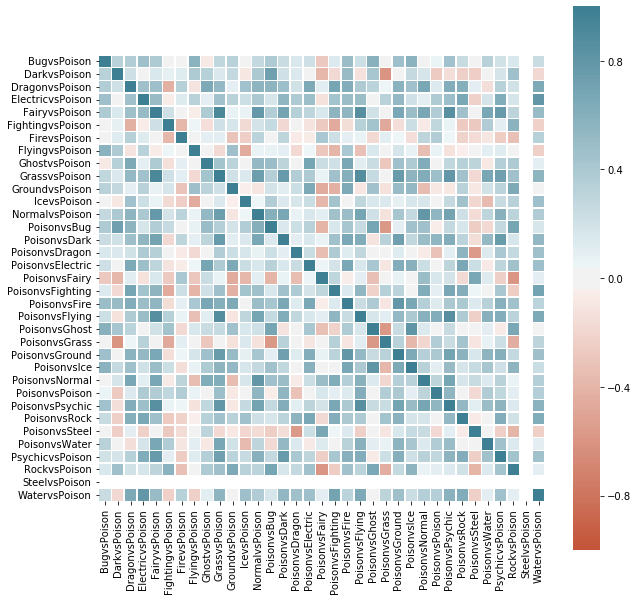

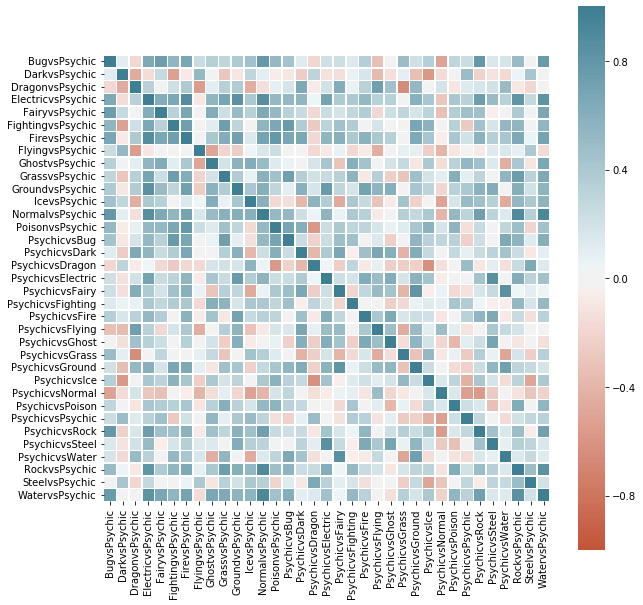

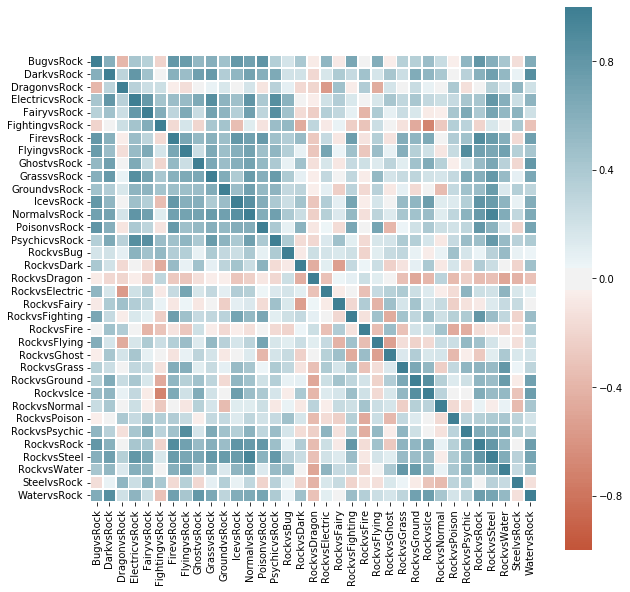

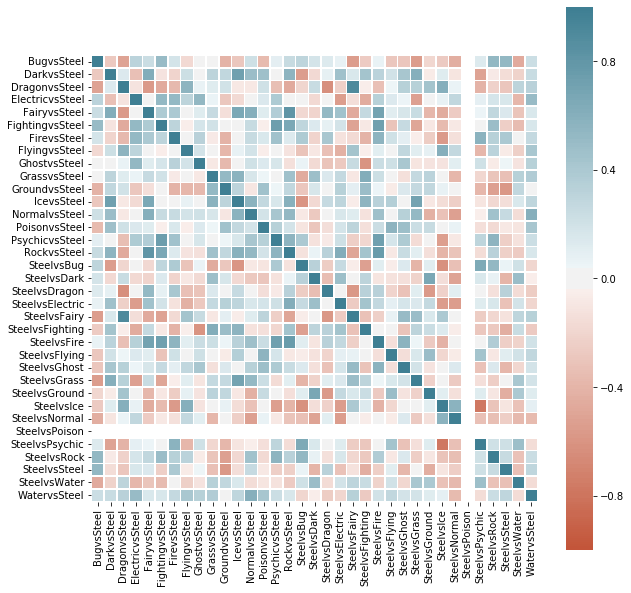

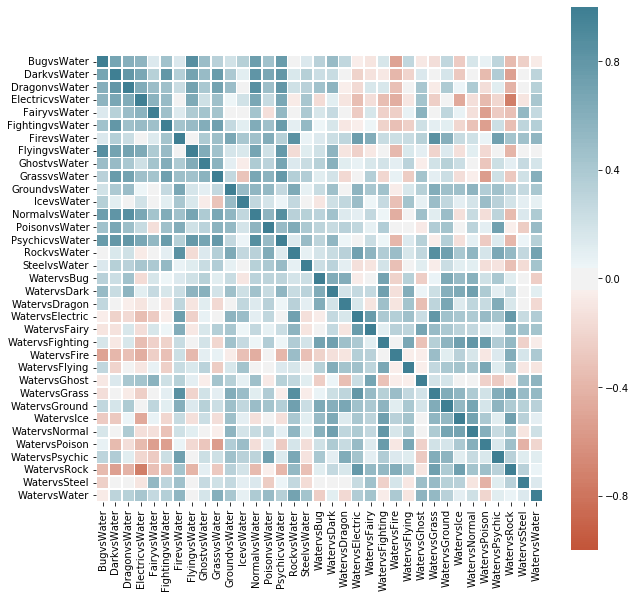

In [254]:
#Move lost comparison
master = []
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]

for t in label1:
    
    label = []
    master = []
    for i in move_avg_data:
        for j in move_avg_data[i]:
            if(i == t or j == t):
                #print(i + " " + j)
                label.append(i + "vs" + j)
                master.append(move_avg_data[i][j]["data"])
            else:
                pass
    #print(master)
    corr = np.corrcoef(master)
    #print(corr)

    plt.figure(figsize=(10,10))
    ax = sns.heatmap(
        corr,
        vmin=-1,vmax=1,center=0,
        cmap=sns.diverging_palette(20,220,n=400),
        square=True,
        #annot=True,
        linewidths=.5
    )
    ax.set_xticklabels(
        label,
        rotation=90,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        label,
        verticalalignment='center',rotation=0
    );
    #plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/type_lost_move/'+t+'.png',bbox_inches='tight')


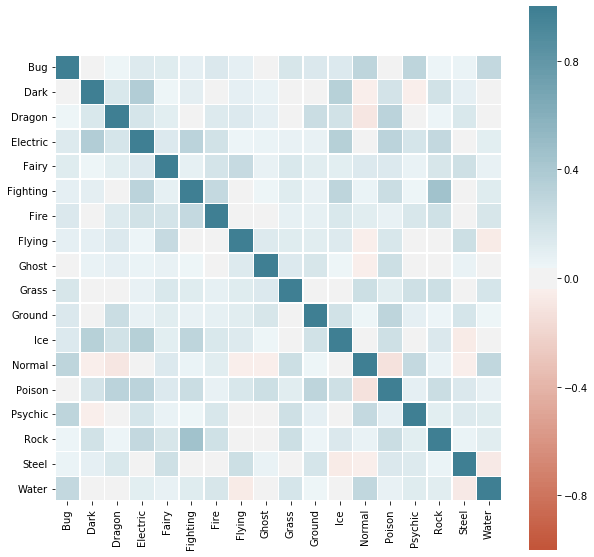

In [255]:
#Aggregated move for each type from all season
full = []
for i in label1:
    tot = []
    for j in season:
#        print(j + " " + i)
        for k in season[j][i]:
#            print(k,season[j][i][k])
            tot.append(season[j][i][k])
#    print(tot)
    full.append(tot)
    
#corr = np.corrcoef(full)
#print(full)
for i in range(len(full)):
    if len(full[i]) < 216:
        for j in range(216 - len(full[i])):
            full[i].append(0)
            
corr = np.corrcoef(full)
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=400),
    square=True,
    #annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    label1,
    rotation=90,
    horizontalalignment='center'
);
ax.set_yticklabels(
    label1,
    verticalalignment='center',rotation=0
);

#plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/aggregate_type_lost_move.png',bbox_inches='tight')


In [256]:

season_w = {}
#----Get the type which it beat----#
#{
# "Bug"{
#       "Ice":10
#       "Fire":29
#  }
#}
#Bug won with 10 ice moves, and 29 fire moves
for num in range(7,19):
    move_eff = {
        "Bug" : {},
        "Dark" : {},
        "Dragon" : {},
        "Electric" :{},
        "Fairy":{},
        "Fighting":{},
        "Fire":{},
        "Flying":{},
        "Ghost":{},
        "Grass":{},
        "Ground":{},
        "Ice":{},
        "Normal":{},
        "Poison":{},
        "Psychic":{},
        "Rock":{},
        "Steel":{},
        "Water":{}
    }
    filedata = "data" + str(num)+".json"
    
    with open(filedata) as file:
        data = json.load(file)
    
    for i in data:
        ind_pok = data[i]["rankingPokemonInfo"]["typeName1"]
        if data[i]["rankingPokemonSuffererWaza"] == None:
            pass
        else:
            for j in range(len(data[i]["rankingPokemonSuffererWaza"])):
                if data[i]["rankingPokemonSuffererWaza"][j]["typeId"]!= 0:
                    if move_id[data[i]["rankingPokemonSuffererWaza"][j]["typeId"]] not in move_eff[ind_pok]:
                        
                        move_eff[ind_pok][move_id[data[i]["rankingPokemonSuffererWaza"][j]["typeId"]]] = 1
                    else:
                        move_eff[ind_pok][move_id[data[i]["rankingPokemonSuffererWaza"][j]["typeId"]]] = move_eff[ind_pok][move_id[data[i]["rankingPokemonSuffererWaza"][j]["typeId"]]] + 1
    season_w["season" + str(num)] = move_eff

In [257]:
#jsonprint(season_w)

In [258]:
#jsonprint(season)

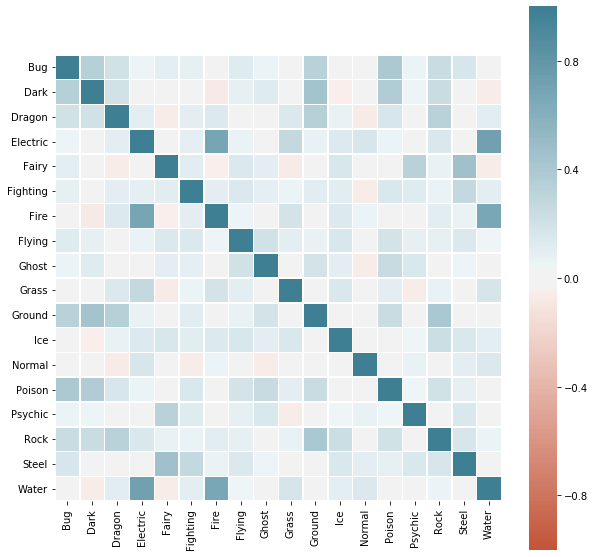

In [259]:
#Aggregate for winning move type for each type
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]
full = []
for i in label1:
    tot = []
    for j in season_w:
#        print(j + " " + i)
        for k in season_w[j][i]:
#            print(k,season[j][i][k])
            tot.append(season_w[j][i][k])
#    print(tot)
    full.append(tot)

    
#corr = np.corrcoef(full)
#print(full)
for i in range(len(full)):
    if len(full[i]) < 216:
        for j in range(216 - len(full[i])):
            full[i].append(0)
            
corr = np.corrcoef(full)
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=400),
    square=True,
    #annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    label1,
    rotation=90,
    horizontalalignment='center'
);
ax.set_yticklabels(
    label1,
    verticalalignment='center',rotation=0
);
#plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/aggregate_type_won_move.png',bbox_inches='tight')



In [260]:
w_move_avg_data = {}
for i in move_eff:
    if i not in w_move_avg_data:
        w_move_avg_data[i] = {}
    for j in move_eff:
        defeated = []
        for k in season_w:
            if(j not in season_w[k][i]):
                defeated.append(0)
            else:
                defeated.append(season_w[k][i][j])
        if(j not in w_move_avg_data[i]):
            w_move_avg_data[i][j] = {
                "data":defeated,        
                "avg":sum(defeated)/11,
            }
        

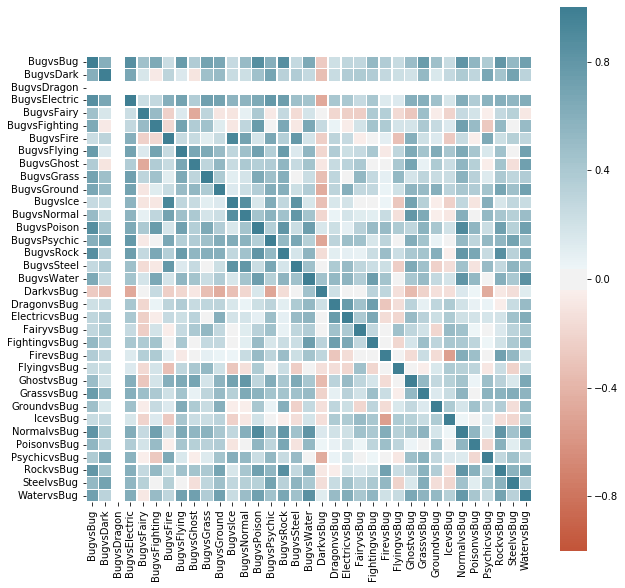

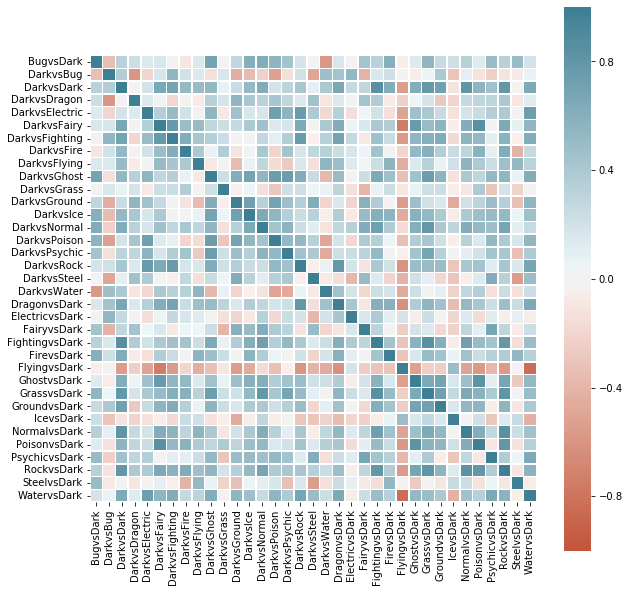

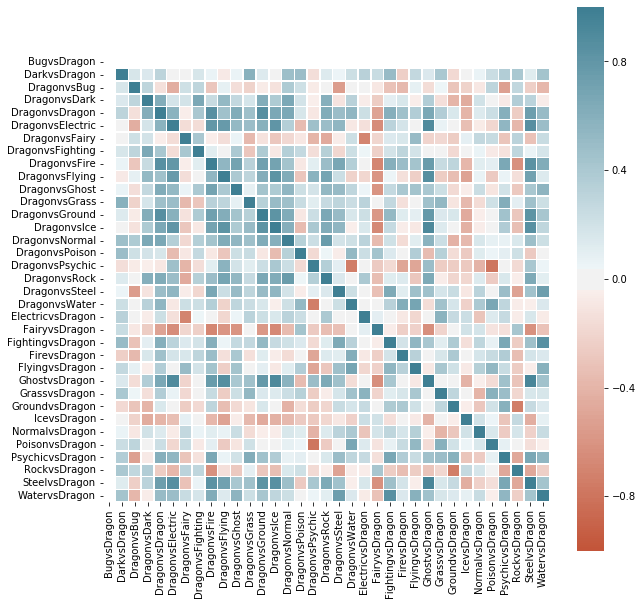

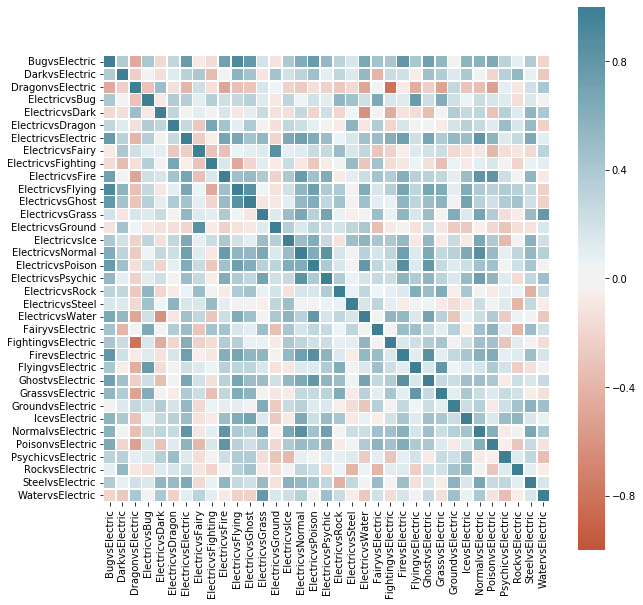

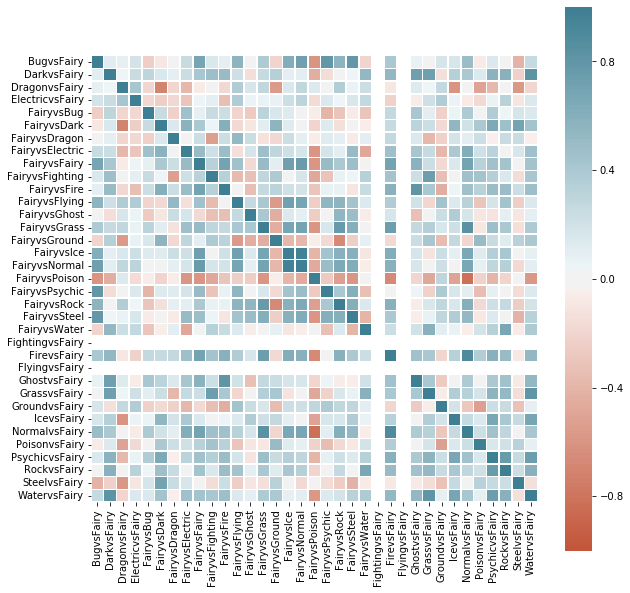

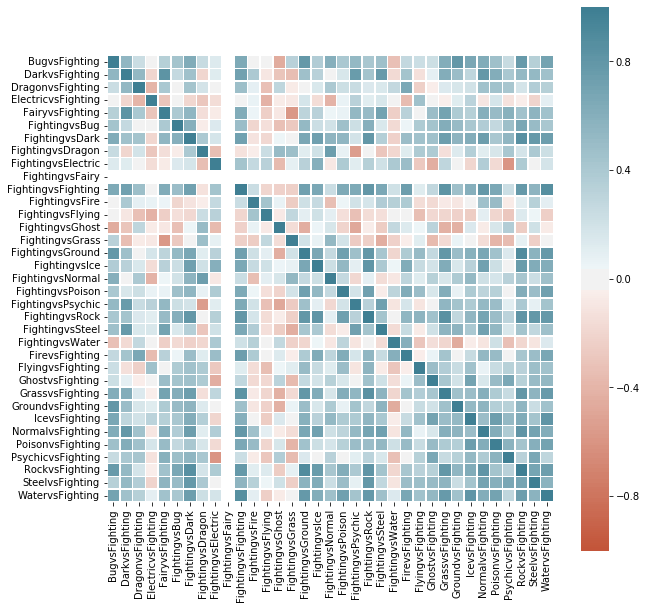

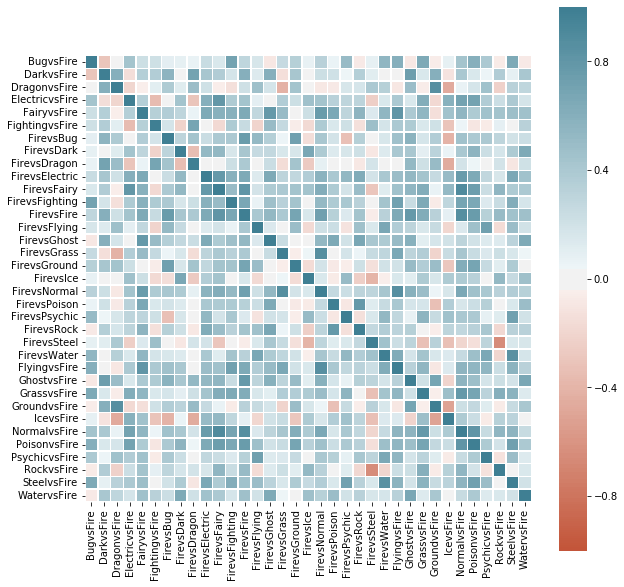

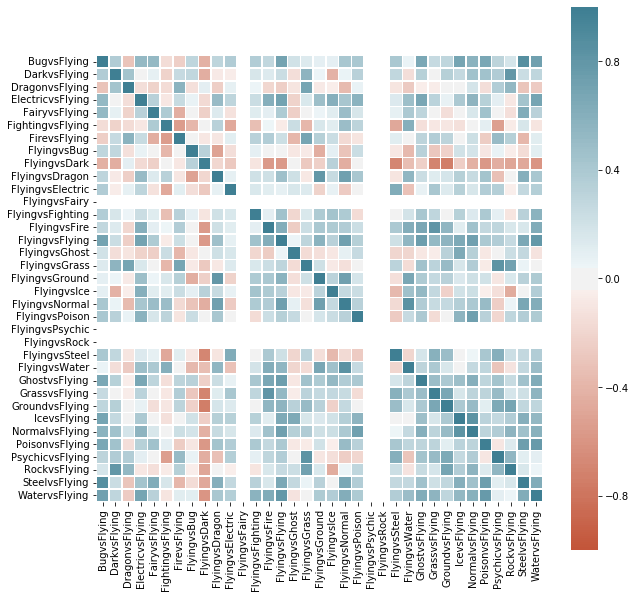

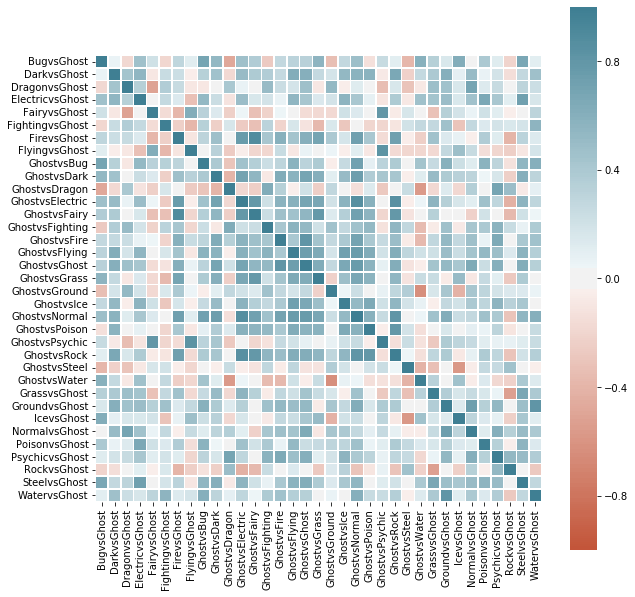

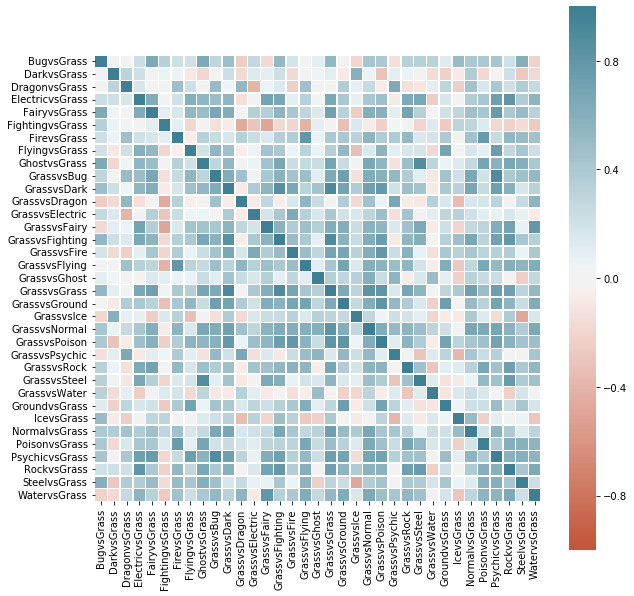

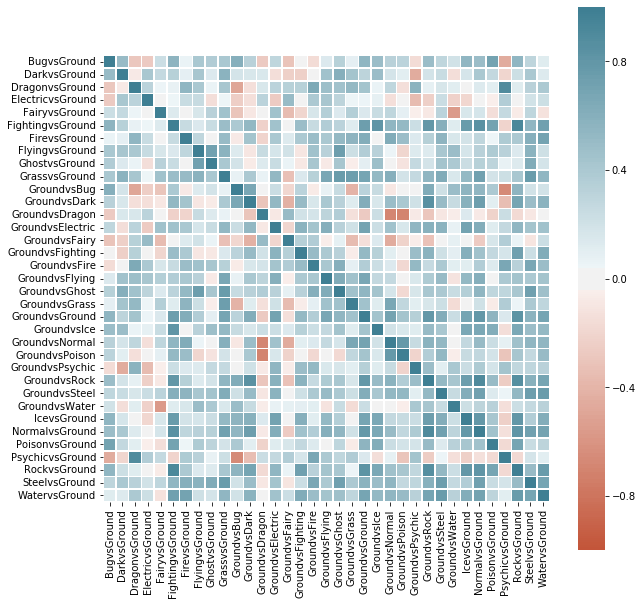

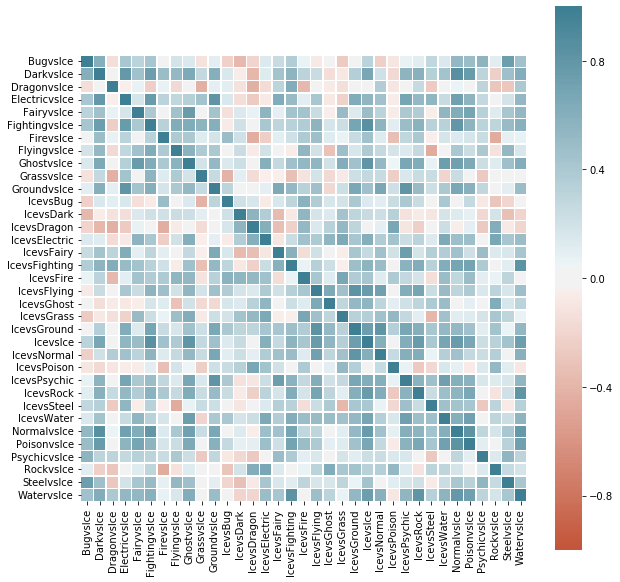

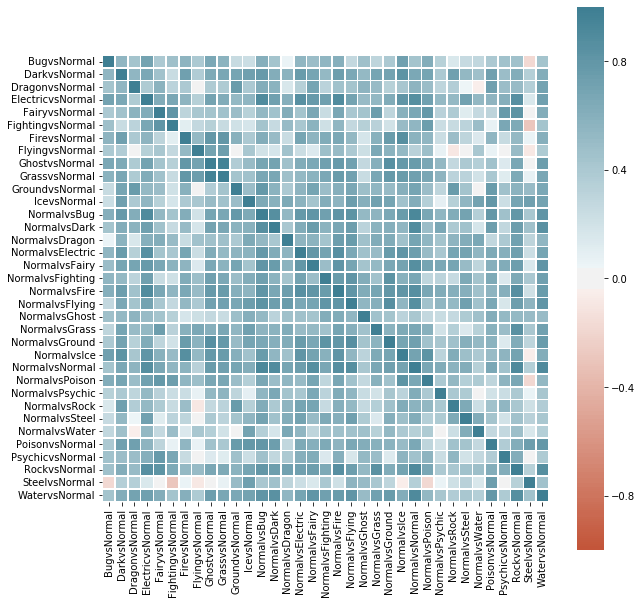

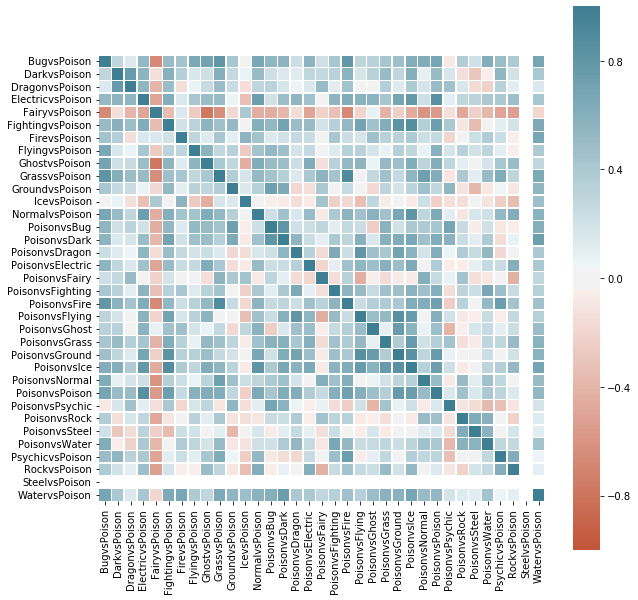

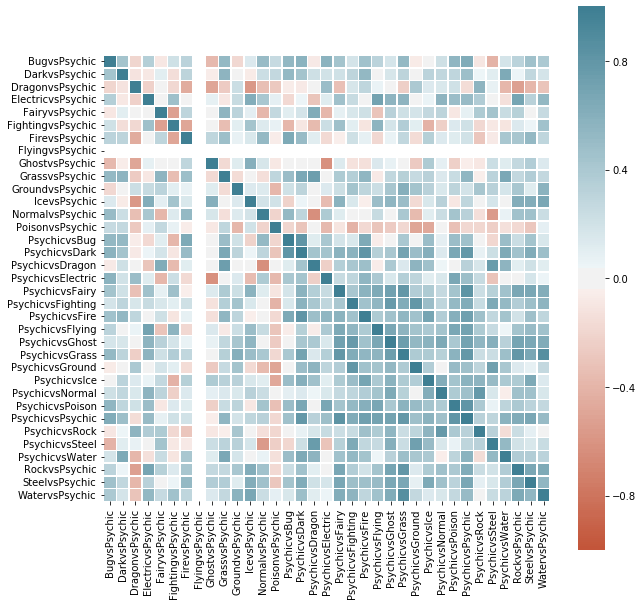

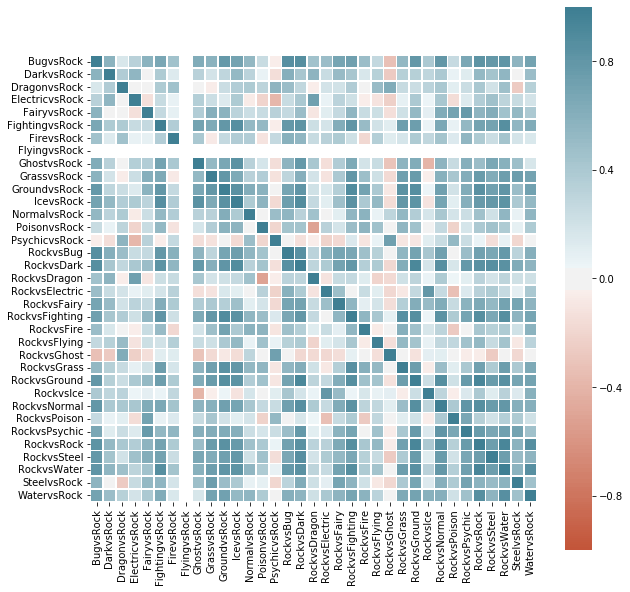

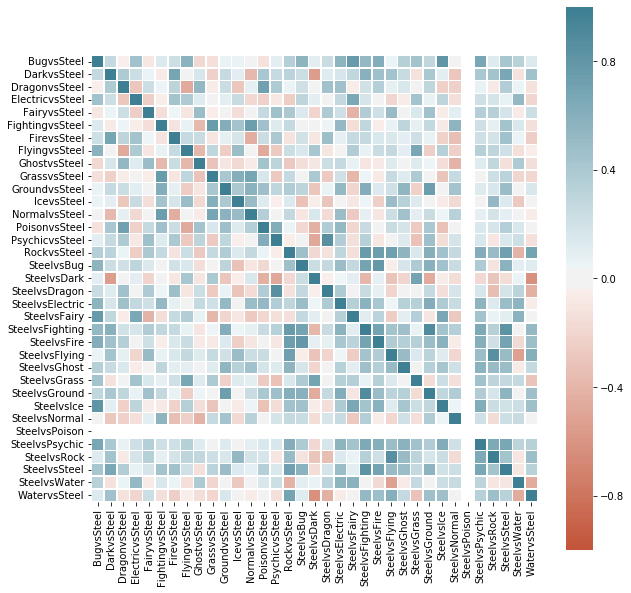

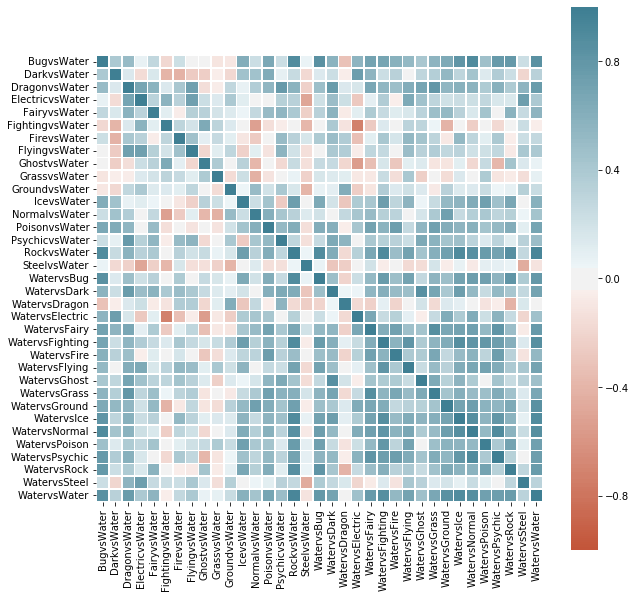

In [261]:
#Move lost comparison
master = []
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]

for t in label1:
    
    label = []
    master = []
    for i in w_move_avg_data:
        for j in w_move_avg_data[i]:
            if(i == t or j == t):
                #print(i + " " + j)
                label.append(i + "vs" + j)
                master.append(w_move_avg_data[i][j]["data"])
            else:
                pass
    #print(master)
    corr = np.corrcoef(master)
    #print(corr)

    plt.figure(figsize=(10,10))
    ax = sns.heatmap(
        corr,
        vmin=-1,vmax=1,center=0,
        cmap=sns.diverging_palette(20,220,n=400),
        square=True,
        #annot=True,
        linewidths=.5
    )
    ax.set_xticklabels(
        label,
        rotation=90,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        label,
        verticalalignment='center',rotation=0
    );
    #plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/type_won_move/'+t+'.png',bbox_inches='tight')


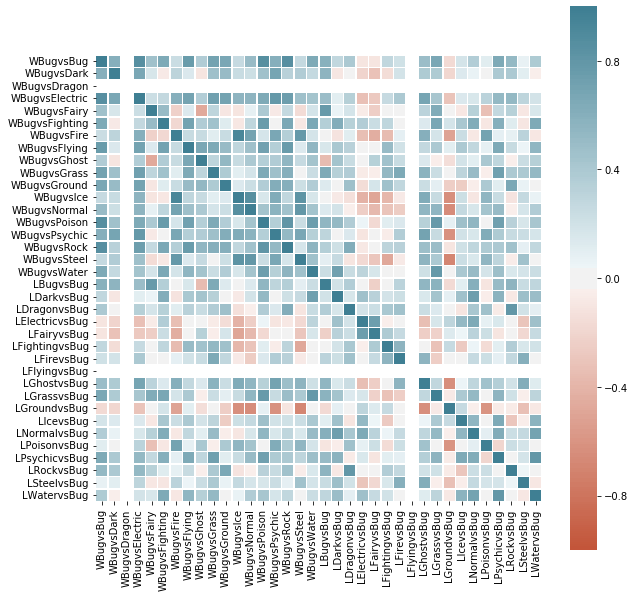

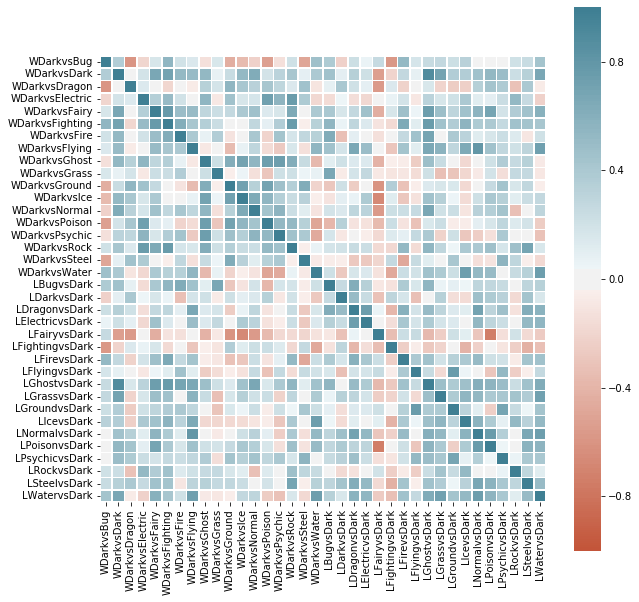

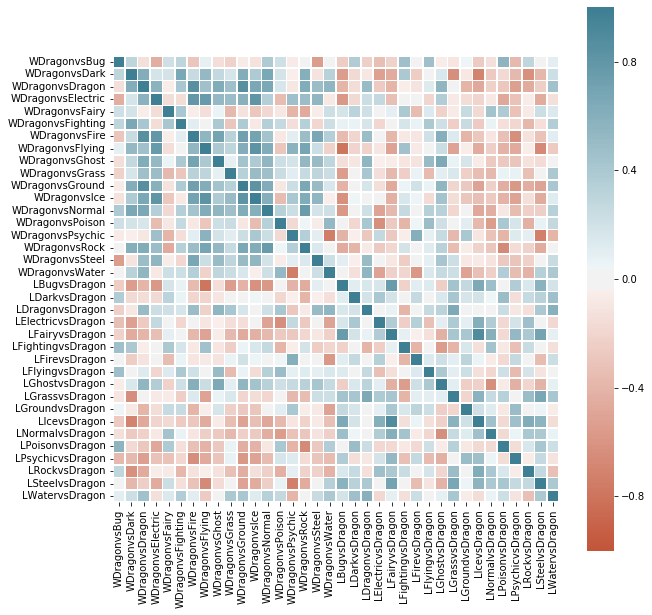

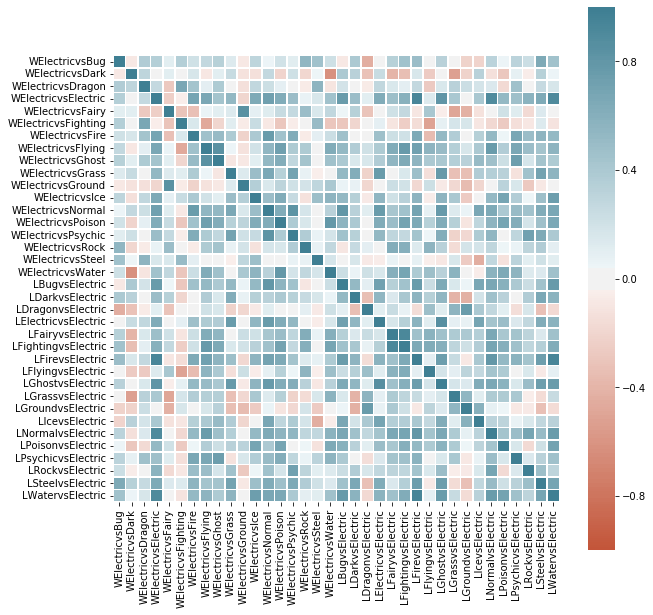

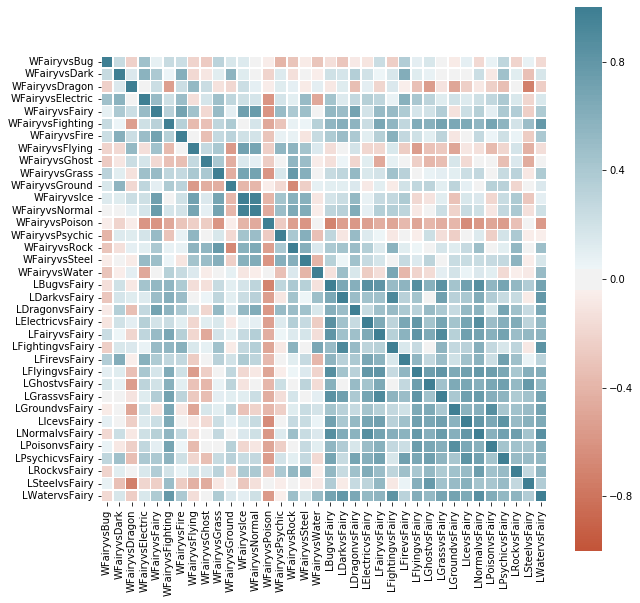

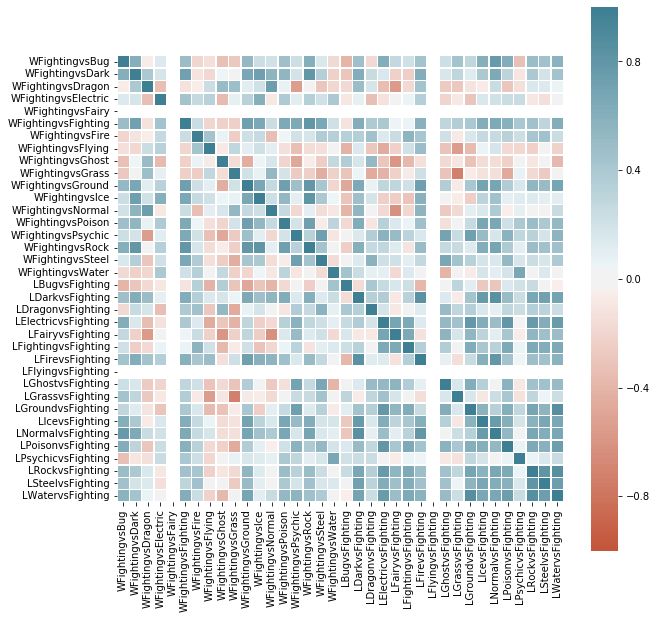

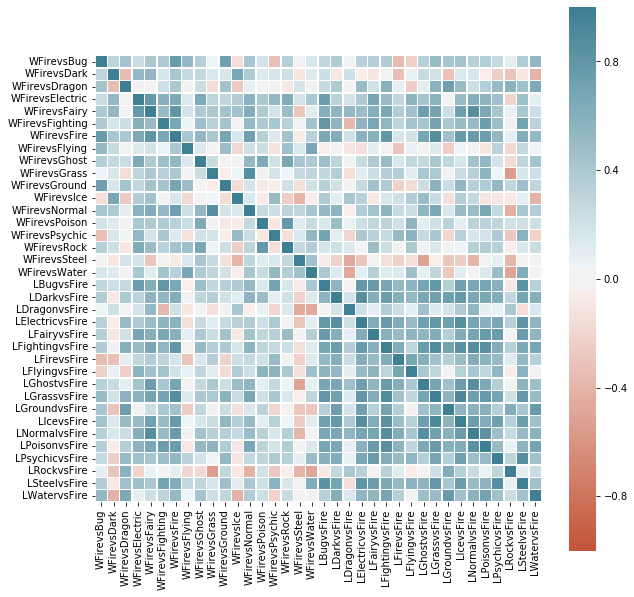

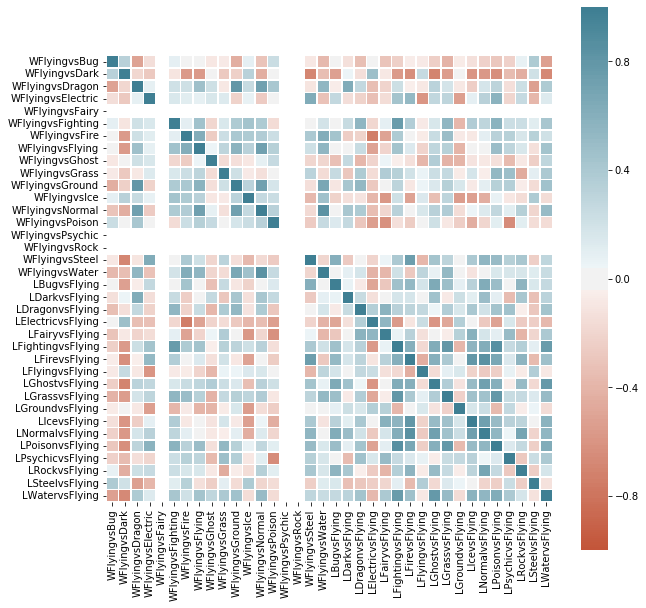

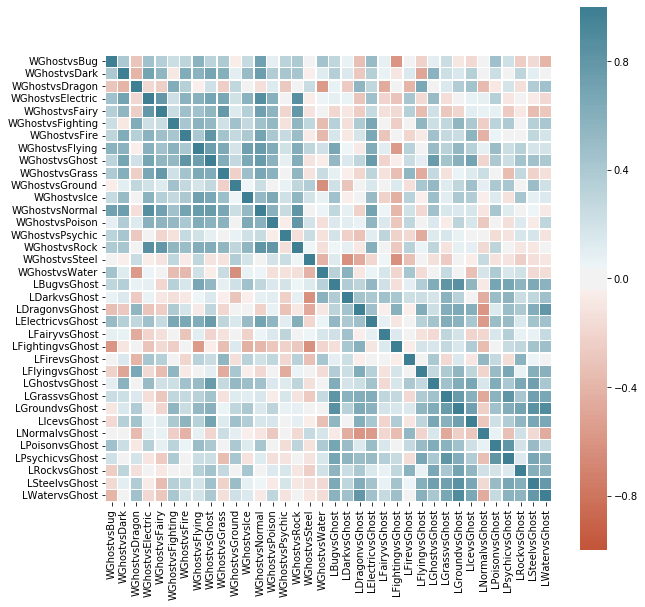

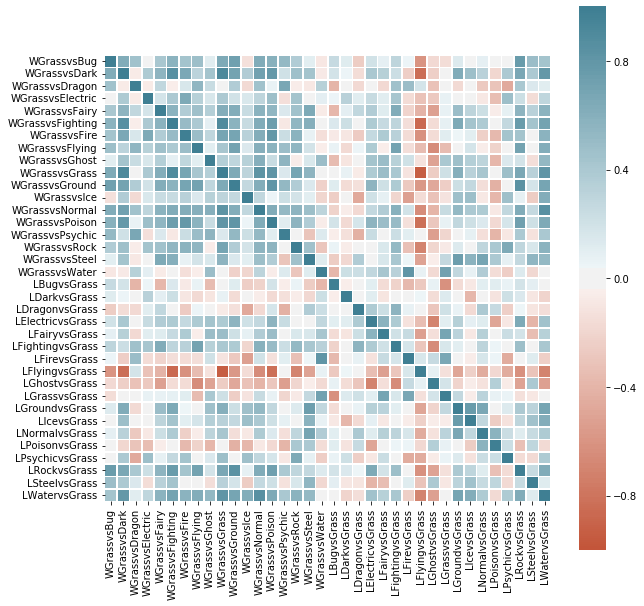

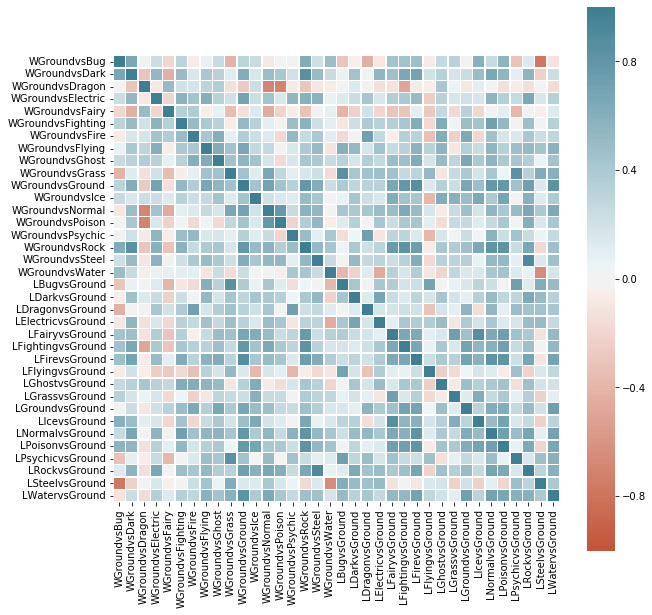

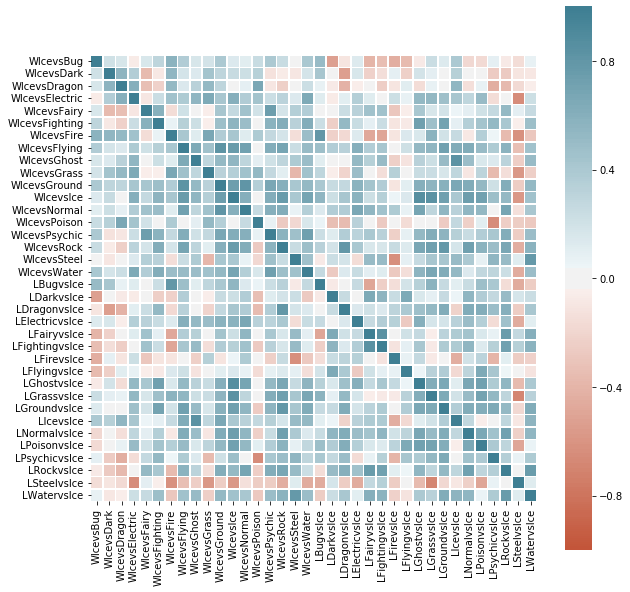

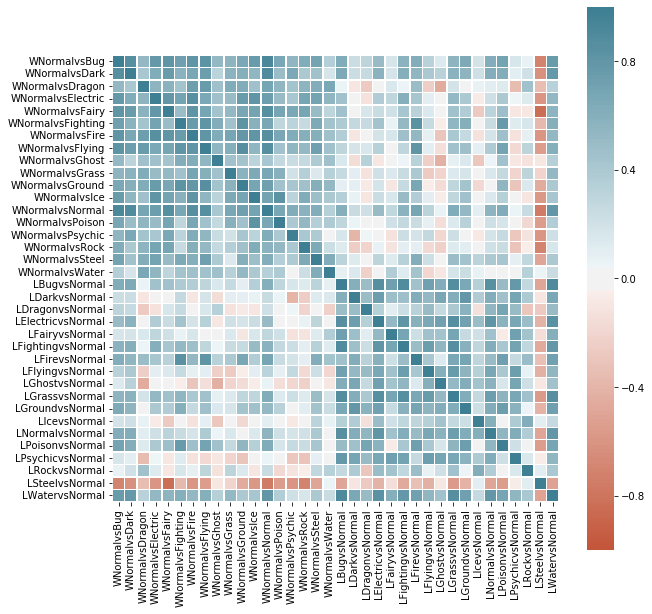

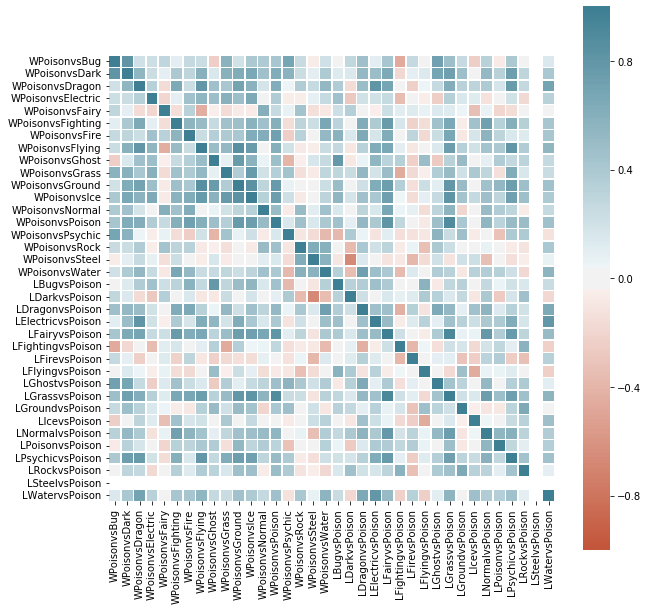

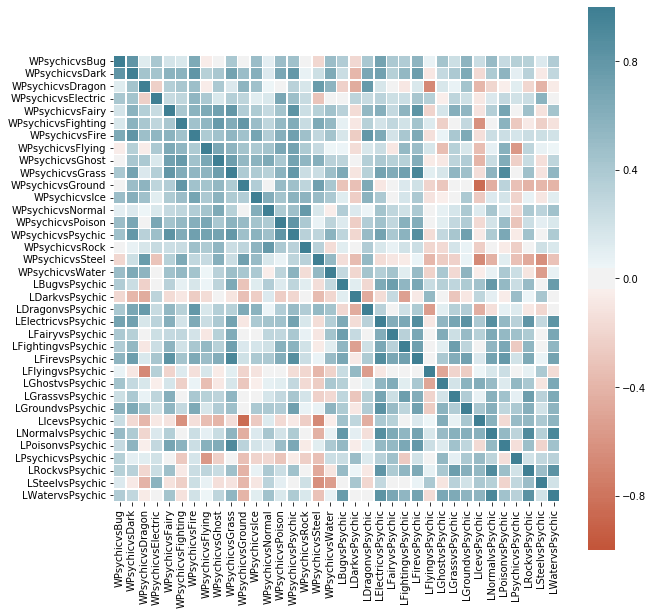

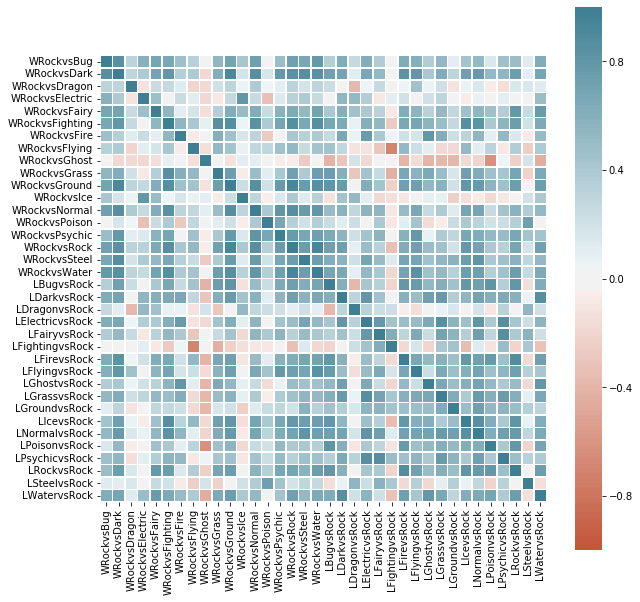

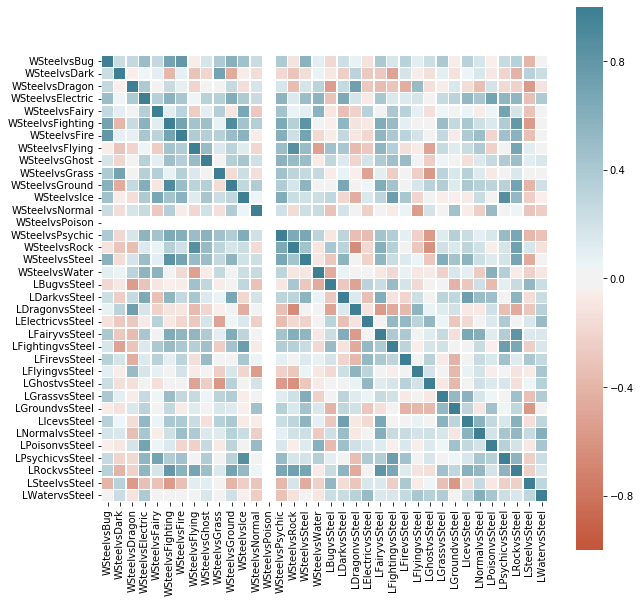

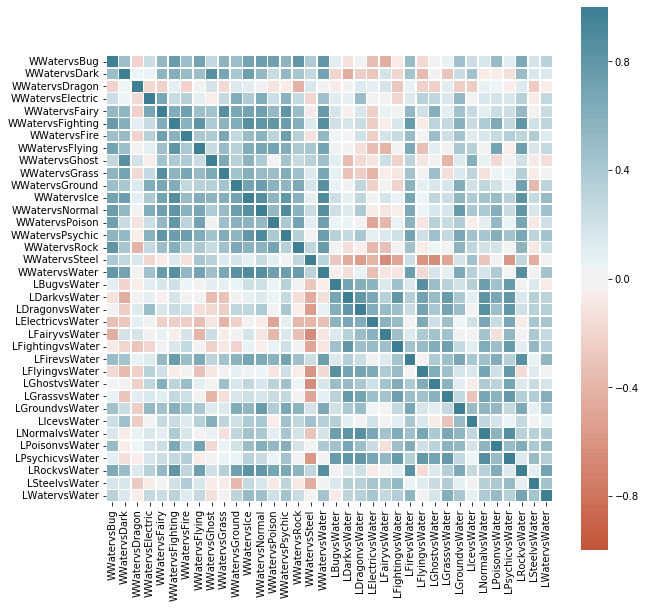

In [262]:
#Get win_avg_data["Bug"]["Bug"]["data"] Bug defeated Bug data for all season
#Get win_avg_data["Fire"]["Bug"]["data"] Fire defeated Bug data for all season
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water"
]
for t in label1:
    master = []
    label = []
    for i in w_move_avg_data:
        for j in w_move_avg_data[i]:
            if i == t:
                master.append(w_move_avg_data[i][j]["data"])
                label.append("W"+i+"vs"+j)
            else:
                pass
    for i in move_avg_data:
        for j in move_avg_data[i]:
            if j == t:
                master.append(move_avg_data[i][j]["data"])
                a = label.append("L"+i+"vs"+j)
                
            else:
                pass
            
    corr = np.corrcoef(master)
    #print(corr)

    plt.figure(figsize=(10,10))
    ax = sns.heatmap(
        corr,
        vmin=-1,vmax=1,center=0,
        cmap=sns.diverging_palette(20,220,n=400),
        square=True,
        #annot=True,
        linewidths=.5
    )
    ax.set_xticklabels(
        label,
        rotation=90,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        label,
        verticalalignment='center',rotation=0
    );
    #plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/won_lost_type_move_compare/'+t+'.png',bbox_inches='tight')



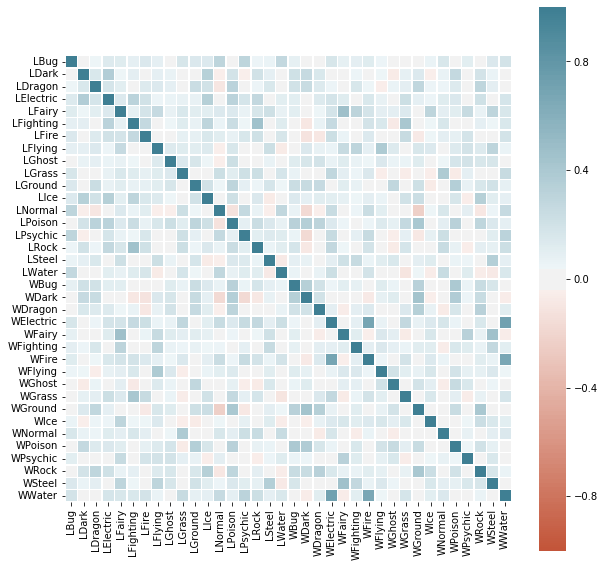

In [263]:
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water",
]
label_g = [
        "LBug",
        "LDark",
        "LDragon",
        "LElectric",
        "LFairy",
        "LFighting",
        "LFire",
        "LFlying",
        "LGhost",
        "LGrass",
        "LGround",
        "LIce",
        "LNormal",
        "LPoison",
        "LPsychic",
        "LRock",
        "LSteel",
        "LWater",
        "WBug",
        "WDark",
        "WDragon",
        "WElectric",
        "WFairy",
        "WFighting",
        "WFire",
        "WFlying",
        "WGhost",
        "WGrass",
        "WGround",
        "WIce",
        "WNormal",
        "WPoison",
        "WPsychic",
        "WRock",
        "WSteel",
        "WWater"
]
full = []
for i in label1:
    tot = []
    for j in season:
        for k in season[j][i]:
            tot.append(season[j][i][k])
    full.append(tot)
    
for i in label1:
    tot = []
    for j in season_w:
#        print(j + " " + i)
        for k in season_w[j][i]:
#            print(k,season[j][i][k])
            tot.append(season_w[j][i][k])
#    print(tot)
    full.append(tot)

for i in range(len(full)):
    if len(full[i]) < 216:
        for j in range(216 - len(full[i])):
            full[i].append(0) 
            
corr = np.corrcoef(full)
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=400),
    square=True,
    #annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    label_g,
    rotation=90,
    horizontalalignment='center'
);
ax.set_yticklabels(
    label_g,
    verticalalignment='center',rotation=0
);


In [264]:
season = {}
#----Gets how many time each type was defeated by another specific type----#
for num in range(7,19):
    type_eff = {
        "Bug" : {},
        "Dark" : {},
        "Dragon" : {},
        "Electric" :{},
        "Fairy":{},
        "Fighting":{},
        "Fire":{},
        "Flying":{},
        "Ghost":{},
        "Grass":{},
        "Ground":{},
        "Ice":{},
        "Normal":{},
        "Poison":{},
        "Psychic":{},
        "Rock":{},
        "Steel":{},
        "Water":{}
    }
    filedata = "data" + str(num)+".json"
    
    with open(filedata) as file:
        data = json.load(file)

    for i in data:
        ind_pok = data[i]["rankingPokemonInfo"]["typeName1"]

        for j in range(len(data[i]["rankingPokemonDown"])):
            if data[i]["rankingPokemonDown"][j]["typeName1"] not in type_eff[ind_pok]:
                type_eff[ind_pok][data[i]["rankingPokemonDown"][j]["typeName1"]] = 1
            else:
                type_eff[ind_pok][data[i]["rankingPokemonDown"][j]["typeName1"]] = type_eff[ind_pok][data[i]["rankingPokemonDown"][j]["typeName1"]] + 1
                
    season["season" + str(num)] = type_eff

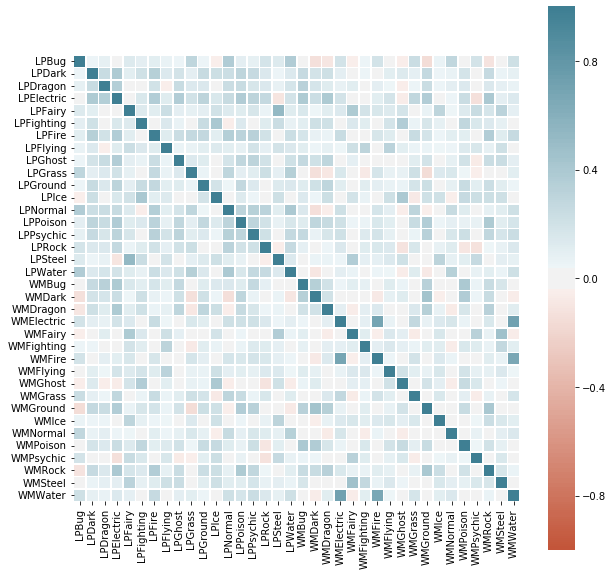

In [265]:
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water",
]
label_g = [
        "LPBug",
        "LPDark",
        "LPDragon",
        "LPElectric",
        "LPFairy",
        "LPFighting",
        "LPFire",
        "LPFlying",
        "LPGhost",
        "LPGrass",
        "LPGround",
        "LPIce",
        "LPNormal",
        "LPPoison",
        "LPPsychic",
        "LPRock",
        "LPSteel",
        "LPWater",
        "WMBug",
        "WMDark",
        "WMDragon",
        "WMElectric",
        "WMFairy",
        "WMFighting",
        "WMFire",
        "WMFlying",
        "WMGhost",
        "WMGrass",
        "WMGround",
        "WMIce",
        "WMNormal",
        "WMPoison",
        "WMPsychic",
        "WMRock",
        "WMSteel",
        "WMWater"
]
full = []
for i in label1:
    tot = []
    for j in season:
        for k in season[j][i]:
            tot.append(season[j][i][k])
    full.append(tot)
    
for i in label1:
    tot = []
    for j in season_w:
#        print(j + " " + i)
        for k in season_w[j][i]:
#            print(k,season[j][i][k])
            tot.append(season_w[j][i][k])
#    print(tot)
    full.append(tot)

for i in range(len(full)):
    if len(full[i]) < 216:
        for j in range(216 - len(full[i])):
            full[i].append(0) 
            
corr = np.corrcoef(full)
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=400),
    square=True,
    #annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    label_g,
    rotation=90,
    horizontalalignment='center'
);
ax.set_yticklabels(
    label_g,
    verticalalignment='center',rotation=0
);
#plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/lost_pok_won_move.png',bbox_inches='tight')



In [266]:
season = {}

#----Get the type of move which it lost too----#
#{
# "Bug"{
#       "Ice":10
#       "Fire":29
#  }
#}
#Bug lost too 10 Ice moves, 29 Fire moves
for num in range(7,19):
    move_eff = {
        "Bug" : {},
        "Dark" : {},
        "Dragon" : {},
        "Electric" :{},
        "Fairy":{},
        "Fighting":{},
        "Fire":{},
        "Flying":{},
        "Ghost":{},
        "Grass":{},
        "Ground":{},
        "Ice":{},
        "Normal":{},
        "Poison":{},
        "Psychic":{},
        "Rock":{},
        "Steel":{},
        "Water":{}
    }
    filedata = "data" + str(num)+".json"
    
    with open(filedata) as file:
        data = json.load(file)
    
    
    for i in data:
        ind_pok = data[i]["rankingPokemonInfo"]["typeName1"]
        if data[i]["rankingPokemonDownWaza"] == None:
            pass
        else:
            for j in range(len(data[i]["rankingPokemonDownWaza"])):
                if data[i]["rankingPokemonDownWaza"][j]["typeId"]!= 0:
                    if move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]] not in move_eff[ind_pok]:
                        
                        move_eff[ind_pok][move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]]] = 1
                    else:
                        move_eff[ind_pok][move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]]] = move_eff[ind_pok][move_id[data[i]["rankingPokemonDownWaza"][j]["typeId"]]] + 1
    season["season" + str(num)] = move_eff

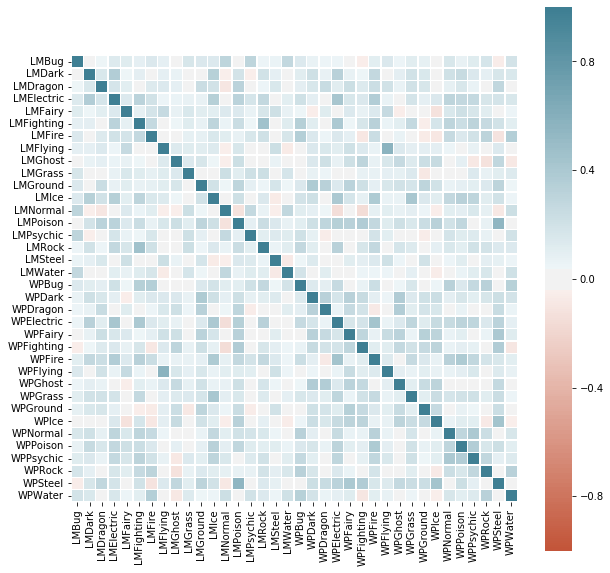

In [267]:
label1 = [
        "Bug",
        "Dark",
        "Dragon",
        "Electric",
        "Fairy",
        "Fighting",
        "Fire",
        "Flying",
        "Ghost",
        "Grass",
        "Ground",
        "Ice",
        "Normal",
        "Poison",
        "Psychic",
        "Rock",
        "Steel",
        "Water",
]
label_g = [
        "LMBug",
        "LMDark",
        "LMDragon",
        "LMElectric",
        "LMFairy",
        "LMFighting",
        "LMFire",
        "LMFlying",
        "LMGhost",
        "LMGrass",
        "LMGround",
        "LMIce",
        "LMNormal",
        "LMPoison",
        "LMPsychic",
        "LMRock",
        "LMSteel",
        "LMWater",
        "WPBug",
        "WPDark",
        "WPDragon",
        "WPElectric",
        "WPFairy",
        "WPFighting",
        "WPFire",
        "WPFlying",
        "WPGhost",
        "WPGrass",
        "WPGround",
        "WPIce",
        "WPNormal",
        "WPPoison",
        "WPPsychic",
        "WPRock",
        "WPSteel",
        "WPWater"
]
full = []
for i in label1:
    tot = []
    for j in season:
        for k in season[j][i]:
            tot.append(season[j][i][k])
    full.append(tot)
    
for i in label1:
    tot = []
    for j in win_season:
#        print(j + " " + i)
        for k in win_season[j][i]:
#            print(k,season[j][i][k])
            tot.append(win_season[j][i][k])
#    print(tot)
    full.append(tot)

for i in range(len(full)):
    if len(full[i]) < 216:
        for j in range(216 - len(full[i])):
            full[i].append(0) 
            
corr = np.corrcoef(full)
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=400),
    square=True,
    #annot=True,
    linewidths=.5
)
ax.set_xticklabels(
    label_g,
    rotation=90,
    horizontalalignment='center'
);
ax.set_yticklabels(
    label_g,
    verticalalignment='center',rotation=0
);
#plt.savefig('/Users/sk/Desktop/Waseda/4th Year/Fall/Fri-3-Analysis of Networked Systems/Final_Project/won_pok_lose_move.png',bbox_inches='tight')
